# Project: Solar Power Generation Data Analysis and Prediction

## DAT540: Introduction to Data Science

---

In [25]:
# Some useful libraries imported here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

import os
cwd = os.getcwd().split('/') # from current working directory...
go_to_dir = ('/'.join(cwd[:-1]))
if not(go_to_dir in os.sys.path):
    os.sys.path.insert(0, go_to_dir)
# print(os.sys.path)

### Intoduction 

The data utilized in this project is sourced from four data sets generated at two solar power plants in India over 34 day period, starting from 2020-05-15 to 2020-06-17 at 15 minutes interval [3]. The data sets contain two power generation data and two weather sensor data. Each plant consist of 22 source inverters that transforms Direct Current (DC) power into Alternating Current (AC) power. The power data sets contain records of the DC power, AC power, daily and total energy yields from each source. Records of the weather sensors include the  ambient temperature, module temperature and irradiation at each plant.


| ![alt_model.png](./images/PV.jpg) |
|:--:|
| <b>Figure 1: A photovoltaic system [9].</b>|

Figure 1 shows a photovoltaic system designed to convert solar power into useable (AC) power. The direct current generated undergoes a series of losses before it gets converted into AC current transmitted for home use [1]

#### Some key definitions

1. **Irradiance**: the power ($P$) of electromagnetic radiation per unit area incident on a surface $[KW/m^2]$.
2. **Energy**: power expended over time  $E = P \times t\, [KWh]$ (anonymous to energy Yield).  Daily yield therefore is the total solar energy converted into electrical per day. Energy yield is calculated as follows [2]: 
    $$ \text{Energy yield} = \text{Module rated Power} \times \text{site Specific irradiation} \times \text{System efficiency}. $$
5. **Ambient temperature**: The air temperature of the environment where the panels are kept.
6. **Module temperature**: The actual temperature of the panels as recorded by the sensors.

#### Structure

The project task has been divided into seperate tasks organized into eight sections:
* Data cleaning and preprocessing
* Data visualization and analysis
* Selection of significant features
* Problem statement
* Choice of machine learning model
* Parameter tuning
* Making predictions
* Model evaluation

These steps are followed by individual reflections, a conclusion and references. We have also made good use of lecture and laboratory materials for the course [4][5].

### Collaboration
Our team did very well in terms of collaboration. We started by creating an outline of the tasks we needed to accomplish.  One meeting was organized with the project supervisor to present our plans and get some inputs on the way forward. Each individual had the opportunity to experiment with the different aspects of the project while sharing our findings both on Github and in physical meetings (held on average twice a week). Through such meetings our goals were constantly reviewed and redefined. As a means to get everyone involved responsibilities towards building the final project reports were shared as follows:
1. Kingsley: Introduction, conclusion and references, while ensuring the different parts of the report flow in a coherent manner. Power point presentation.
2. Jing: Sections 1 and 2
3. Nafis: Sections 3 and 4 
4. Sajid: Section 5 and 6
5. Safin: Sections 7 and 8

---
### **Section 1:** Data cleaning and preprocessing


#### 1.1 Load dataset and check for null values
First we load the *Power Generation Data* and *Weather Sensor Data* from both plants using Panda's csv reader.

In [26]:
plant1gen = pd.read_csv('./Datasets/Plant_1_Generation_Data.csv')   # reads power generation data from plant 1
plant2gen = pd.read_csv('./Datasets/Plant_2_Generation_Data.csv')   # reads power generation data from plant 2
plant1wea = pd.read_csv('./Datasets/Plant_1_Weather_Sensor_Data.csv') # reads weather sensor data from plant 1
plant2wea = pd.read_csv('./Datasets/Plant_2_Weather_Sensor_Data.csv') # reads weather sensor data from plant 2

print('Checking for null values...')
pd.Series({'Plant 1: Power generation data contains null values?': plant1gen.isnull().any(axis=None),
    'Plant 2: Power generation data contains null values?': plant2gen.isnull().any(axis=None),
    'Plant 1: Weather sensor data contains null values?': plant1wea.isnull().any(axis=None),
    'Plant 2: Weather sensor data contains null values?': plant2wea.isnull().any(axis=None)})

Checking for null values...


Plant 1: Power generation data contains null values?    False
Plant 2: Power generation data contains null values?    False
Plant 1: Weather sensor data contains null values?      False
Plant 2: Weather sensor data contains null values?      False
dtype: bool

#### 1.2 Remove whitespaces

In [27]:
plant1gen = plant1gen.applymap(lambda x: x.strip() if isinstance(x,str) else x)
plant1wea = plant1wea.applymap(lambda x: x.strip() if isinstance(x,str) else x)
plant2gen = plant2gen.applymap(lambda x: x.strip() if isinstance(x,str) else x)
plant2wea = plant2wea.applymap(lambda x: x.strip() if isinstance(x,str) else x)

#### 1.3 Check for data type

In [28]:
# Column and row indexing used
print('Row indexing type:')
print(
pd.Series({'Plant 1 - power generation data:': plant1gen.index.dtype,
    'Plant 2 - power generation data:': plant2gen.index.dtype,
    'Plant 1 - weather sensor data:': plant1wea.index.dtype,
    'Plant 2 - weather sensor data:': plant2wea.index.dtype})
)

print('\nColumn indexing:')
pd.DataFrame([plant1gen.columns.tolist(),
    plant2gen.columns.tolist(),
    plant1wea.columns.tolist(),
    plant2wea.columns.tolist()], 
    index =[['Plant 1','Plant 2',
        'Plant 1','Plant 2'],
    ['power generation data:',
    'power generation data:',
    'weather sensor data:',
    'weather sensor data:']])

Row indexing type:
Plant 1 - power generation data:    int64
Plant 2 - power generation data:    int64
Plant 1 - weather sensor data:      int64
Plant 2 - weather sensor data:      int64
dtype: object

Column indexing:


0         1           2  \
Plant 1 power generation data:  DATE_TIME  PLANT_ID  SOURCE_KEY   
Plant 2 power generation data:  DATE_TIME  PLANT_ID  SOURCE_KEY   
Plant 1 weather sensor data:    DATE_TIME  PLANT_ID  SOURCE_KEY   
Plant 2 weather sensor data:    DATE_TIME  PLANT_ID  SOURCE_KEY   

                                                  3                   4  \
Plant 1 power generation data:             DC_POWER            AC_POWER   
Plant 2 power generation data:             DC_POWER            AC_POWER   
Plant 1 weather sensor data:    AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   
Plant 2 weather sensor data:    AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   

                                          5            6  
Plant 1 power generation data:  DAILY_YIELD  TOTAL_YIELD  
Plant 2 power generation data:  DAILY_YIELD  TOTAL_YIELD  
Plant 1 weather sensor data:    IRRADIATION         None  
Plant 2 weather sensor data:    IRRADIATION         None

In [29]:
# Data types in each column
print('Data types in each column:')
pd.DataFrame(
    [plant1gen.dtypes, plant2gen.dtypes, plant1wea.dtypes, plant2wea.dtypes],
    index =[['Plant 1','Plant 2',
        'Plant 1','Plant 2'],
    ['power generation data:',
    'power generation data:',
    'weather sensor data:',
    'weather sensor data:']]
).fillna('')

Data types in each column:


DATE_TIME PLANT_ID SOURCE_KEY DC_POWER  \
Plant 1 power generation data:    object    int64     object  float64   
Plant 2 power generation data:    object    int64     object  float64   
Plant 1 weather sensor data:      object    int64     object            
Plant 2 weather sensor data:      object    int64     object            

                               AC_POWER DAILY_YIELD TOTAL_YIELD  \
Plant 1 power generation data:  float64     float64     float64   
Plant 2 power generation data:  float64     float64     float64   
Plant 1 weather sensor data:                                      
Plant 2 weather sensor data:                                      

                               AMBIENT_TEMPERATURE MODULE_TEMPERATURE  \
Plant 1 power generation data:                                          
Plant 2 power generation data:                                          
Plant 1 weather sensor data:               float64            float64   
Plant 2 weather sensor data:               float64            float64   

                               IRRADIATION  
Plant 1 power generation data:              
Plant 2 power generation data:              
Plant 1 weather sensor data:       float64  
Plant 2 weather sensor data:       float64

We observe that all four data sets contain three features in common, namely: DATE_TIME, PLANT_ID, SOURCE_KEY. The power generation data has in addition four features with *float data types* (DC_POWER, AC_POWER, DAILY_YIELD, TOTAL_YIELD), while the sensor generata data has three features with *float data types* (AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION).

#### 1.4 Reformat date and time 

In [30]:
plant1gen['DATE_TIME'] = pd.to_datetime(plant1gen['DATE_TIME'],format='%d-%m-%Y %H:%M')
plant1wea['DATE_TIME'] = pd.to_datetime(plant1wea['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
plant2gen['DATE_TIME'] = pd.to_datetime(plant2gen['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
plant2wea['DATE_TIME'] = pd.to_datetime(plant2wea['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

#### 1.5 Check for duplicate records

In [31]:
print('Checking for duplicate records...')
pd.Series({'Plant 1: Power generation data contains duplicate records?': plant1gen.duplicated().any(),
    'Plant 2: Power generation data contains duplicate records?': plant2gen.duplicated().any(),
    'Plant 1: Weather sensor data contains duplicate records?': plant1wea.duplicated().any(),
    'Plant 2: Weather sensor data contains duplicate records?': plant2wea.duplicated().any()})

Checking for duplicate records...


Plant 1: Power generation data contains duplicate records?    False
Plant 2: Power generation data contains duplicate records?    False
Plant 1: Weather sensor data contains duplicate records?      False
Plant 2: Weather sensor data contains duplicate records?      False
dtype: bool

#### 1.6 Check for missing values

In [32]:
# Shapes of data sets
print('Shapes of data: ')
pd.Series({'Plant 1 - power generation data:': plant1gen.shape,
    'Plant 2 - power generation data:': plant2gen.shape,
    'Plant 1 - weather sensor data:': plant1wea.shape,
    'Plant 2 - weather sensor data:': plant2wea.shape})

Shapes of data: 


Plant 1 - power generation data:    (68778, 7)
Plant 2 - power generation data:    (67698, 7)
Plant 1 - weather sensor data:       (3182, 6)
Plant 2 - weather sensor data:       (3259, 6)
dtype: object

In [33]:
#Extract Date
plant1gen['Date'] = pd.to_datetime(plant1gen['DATE_TIME']).dt.date
plant2gen['Date'] = pd.to_datetime(plant2gen['DATE_TIME']).dt.date
plant1wea['Date'] = pd.to_datetime(plant1wea['DATE_TIME']).dt.date
plant2wea['Date'] = pd.to_datetime(plant2wea['DATE_TIME']).dt.date

In [34]:
print("Number of Unique Source Keys in Plant 01 Power Generation Data: ",len(plant1gen['SOURCE_KEY'].unique()))
print("Number of Unique Source Keys in Plant 02 Power Generation Data: ",len(plant2gen['SOURCE_KEY'].unique()))

Number of Unique Source Keys in Plant 01 Power Generation Data:  22
Number of Unique Source Keys in Plant 02 Power Generation Data:  22


In [35]:
print("Number of Unique Date in Plant 01 Power Generation Data: ",len(plant1gen['Date'].unique()))
print("Number of Unique Date in Plant 02 Power Generation Data: ",len(plant2gen['Date'].unique()))

Number of Unique Date in Plant 01 Power Generation Data:  34
Number of Unique Date in Plant 02 Power Generation Data:  34


**Missing values on power generation data**

There are 22 Inverters in each plant, and each inverter gives 4 readings per hour.
* In 24 hours, each inverter will give total 04*24=96 readings
* In 24 hours, all 22 inverters will give total 96*22=2112 readings
* In 34 days, all 22 inverters will give total 2112*34=71808 readings

So, **Total Expected Rows in each plant of Generation Data: 71808**

Whereas, 

* **Total Present Rows in Plant 01 Generation Data: 68778**
* **Total Present Rows in Plant 02 Generation Data: 67698**

We can see that,
* *No of missing rows in Plant 01 Generation Data = 3030 rows (4.22%)*
* *No of missing rows in Plant 02 Generation Data= 4110 rows (5.72%)*

In [36]:
print("Number of Unique Source Keys in Plant 01 Weather Sensor Data: ",len(plant1wea['SOURCE_KEY'].unique()))
print("Number of Unique Source Keys in Plant 02 Weather Sensor Data: ",len(plant2wea['SOURCE_KEY'].unique()))

Number of Unique Source Keys in Plant 01 Weather Sensor Data:  1
Number of Unique Source Keys in Plant 02 Weather Sensor Data:  1


In [37]:
print("Number of Unique Date in Plant 01 Weather Sensor Data: ",len(plant1wea['Date'].unique()))
print("Number of Unique Date in Plant 02 Weather Sensor Data: ",len(plant2wea['Date'].unique()))

Number of Unique Date in Plant 01 Weather Sensor Data:  34
Number of Unique Date in Plant 02 Weather Sensor Data:  34


**Missing values on weather sensor data**

There is only one Weather Sensor in each plant, and each sensor gives 4 readings per hour.
* In 24 hours, each inverter will give total 04*24=96 readings
* In 34 days, total number of readings in a single plant will be 34*96=3264

So, **Total expected rows in each plant of Weather Sensor Data: 3264**

Whereas,

* **Total Present Rows in Plant 01 Weather Sensor Data: 3182** 
* **Total Present Rows in Plant 02 Weather Sensor Data: 3259**

We can see that,
* *No of missing rows in Plant 01 Weather Sensor Data = 82 rows (2.51%)*
* *No of missing rows in Plant 02 Weather Sensor Data = 05 rows (0.15%)*

***We can find the visualization of this part in section 2.4***

#### 1.7 Delete irrelevant records

In [38]:
# Delete irrelevant records, fields - plant ID column
plant1gen.drop(columns='PLANT_ID',axis=1,inplace=True)
plant2gen.drop(columns='PLANT_ID',axis=1,inplace=True)
plant1wea.drop(columns='PLANT_ID',axis=1,inplace=True)
plant2wea.drop(columns='PLANT_ID',axis=1,inplace=True)

#### 1.8 Check for data validity

In [39]:
#Plant 1 power generation data
plant1gen.describe()

DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count  68778.000000  68778.000000  68778.000000  6.877800e+04
mean    3147.426211    307.802752   3295.968737  6.978712e+06
std     4036.457169    394.396439   3145.178309  4.162720e+05
min        0.000000      0.000000      0.000000  6.183645e+06
25%        0.000000      0.000000      0.000000  6.512003e+06
50%      429.000000     41.493750   2658.714286  7.146685e+06
75%     6366.964286    623.618750   6274.000000  7.268706e+06
max    14471.125000   1410.950000   9163.000000  7.846821e+06

In [40]:
#Plant 2 power generation data
plant2gen.describe()

DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count  67698.000000  67698.000000  67698.000000  6.769800e+04
mean     246.701961    241.277825   3294.890295  6.589448e+08
std      370.569597    362.112118   2919.448386  7.296678e+08
min        0.000000      0.000000      0.000000  0.000000e+00
25%        0.000000      0.000000    272.750000  1.996494e+07
50%        0.000000      0.000000   2911.000000  2.826276e+08
75%      446.591667    438.215000   5534.000000  1.348495e+09
max     1420.933333   1385.420000   9873.000000  2.247916e+09

***Observation***

When we look at the generation data from Plant 1 and Plant 2 by using describe method, we can see that the value of DC Power between two power plants varies a lot. Therefore we need to check if there are anomalies in DC Power.

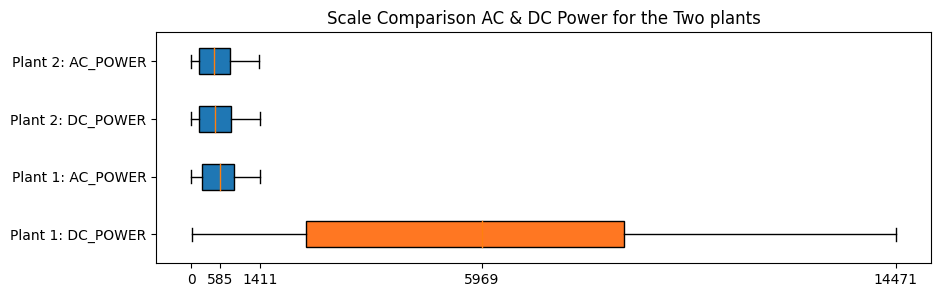

In [41]:
plant1gen_dc_power = plant1gen[plant1gen['DC_POWER'] > 0]['DC_POWER'].values
plant1gen_ac_power = plant1gen[plant1gen['AC_POWER'] > 0]['AC_POWER'].values

plant2gen_dc_power =plant2gen[plant2gen['DC_POWER'] > 0]['DC_POWER'].values
plant2gen_ac_power =plant2gen[plant2gen['AC_POWER'] > 0]['AC_POWER'].values

data = [plant1gen_dc_power,plant1gen_ac_power,plant2gen_dc_power,plant2gen_ac_power]
labels = ['Plant 1: DC_POWER','Plant 1: AC_POWER',
            'Plant 2: DC_POWER','Plant 2: AC_POWER']
plt.figure(figsize=(10,3))
patches = plt.boxplot(data ,labels=labels,vert=False, patch_artist=True)
patches['boxes'][0].set_facecolor( '#FF7722')
plt.xticks([0,np.median(plant1gen_ac_power),plant1gen_ac_power.max(),
            np.median(plant1gen_dc_power),plant1gen_dc_power.max()])
plt.title("Scale Comparison AC & DC Power for the Two plants")
plt.show()

In [42]:
# Comparison of AC/DC power ratio (efficiency) between Plant 1 and Plant 2 
plant1_eff = 100*np.max(plant1gen_ac_power)/np.max(plant1gen_dc_power )
print(f"Power ratio AC/DC (Efficiency) for plant 1:  {plant1_eff:0.3f}%")
plant2_eff = 100*np.max(plant2gen_ac_power)/np.max( plant2gen_dc_power)
print(f"Power ratio AC/DC (Efficiency)for plant 2: {plant2_eff:0.3f}%")
print(f"Eff_plant_1/Eff_plant_2 (using max values): {plant2_eff/plant1_eff:.3f}")

Power ratio AC/DC (Efficiency) for plant 1:  9.750%
Power ratio AC/DC (Efficiency)for plant 2: 97.501%
Eff_plant_1/Eff_plant_2 (using max values): 10.000


In [43]:
efficiency = ((plant2gen_ac_power)/np.mean(plant2gen_dc_power))/(np.mean(plant1gen_ac_power)/np.mean(plant1gen_dc_power))
print(f"Scale ratio comparison ( using mean values ): {efficiency.mean():.3f}")

Scale ratio comparison ( using mean values ): 10.001


We notice that difference between DC power values from plant 1 and the rest is significant. The calculation of comparison efficiency is exactly 10, which means the scale is off by exactly one digit. Therefore we recalculate the DC_POWER on Plant 1.

**Rescaling DC Power from Plant 1**

In [44]:
# rescaling DC Power of plant 1
def scale_dc_power(df):
    df['DC_POWER'] = df['DC_POWER'].values/10
    return df

plant1gen = scale_dc_power(plant1gen)

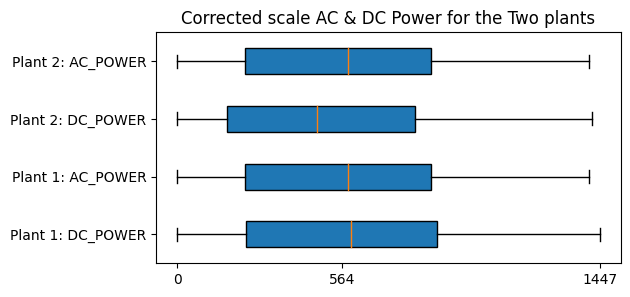

In [45]:
plant1gen_dc_power = plant1gen['DC_POWER'][plant1gen['DC_POWER']>0].values
data2 = [plant1gen_dc_power,plant1gen_ac_power,plant2gen_dc_power,plant1gen_ac_power]
plt.figure(figsize=(6,3))
patches = plt.boxplot(data2,showfliers=False, vert=False,labels=labels, patch_artist=True)
median_2 = np.median(np.hstack(data2))
max_val_2 = plant1gen_dc_power.max()
plt.xticks([0,median_2,max_val_2])
plt.title("Corrected scale AC & DC Power for the Two plants")
# fig.tight_layout(pad=5)
plt.show()

After we have checked for null, duplicate and missing values and we also applied with scalling. Now we proceed to the visualization stage.

---
### **Section 2:** Data visualization and analysis 

#### 2.1 An overview of all features of dataset 

It is reasonable at this point to *combine* the the power generation data sets from both plants into one single data set and analyze all dataset. We do the same for the weather sensor data.

In [46]:
# Combine power generation data from both plants (along axis 0)
pgen_data = pd.concat([plant1gen,plant2gen], ignore_index=True)
print('First 5 and last 5 records of concatenated power generation data:')
pd.concat([pgen_data.head(),
pgen_data.tail()])

First 5 and last 5 records of concatenated power generation data:


DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0      2020-05-15 00:00:00  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1      2020-05-15 00:00:00  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2      2020-05-15 00:00:00  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3      2020-05-15 00:00:00  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4      2020-05-15 00:00:00  McdE0feGgRqW7Ca       0.0       0.0          0.0   
136471 2020-06-17 23:45:00  q49J1IKaHRwDQnt       0.0       0.0       4157.0   
136472 2020-06-17 23:45:00  rrq4fwE8jgrTyWY       0.0       0.0       3931.0   
136473 2020-06-17 23:45:00  vOuJvMaM2sgwLmb       0.0       0.0       4322.0   
136474 2020-06-17 23:45:00  xMbIugepa2P7lBB       0.0       0.0       4218.0   
136475 2020-06-17 23:45:00  xoJJ8DcxJEcupym       0.0       0.0       4316.0   

        TOTAL_YIELD        Date  
0         6259559.0  2020-05-15  
1         6183645.0  2020-05-15  
2         6987759.0  2020-05-15  
3         7602960.0  2020-05-15  
4         7158964.0  2020-05-15  
136471     520758.0  2020-06-17  
136472  121131356.0  2020-06-17  
136473    2427691.0  2020-06-17  
136474  106896394.0  2020-06-17  
136475  209335741.0  2020-06-17

We check the number of unique values in the non-float features and investigate the object-type (DATE_TIME, SOURCE_KEY).

In [47]:
print('List of Source Inverters for plant 1 :\n ',plant1gen['SOURCE_KEY'].unique())
print('List of Source Inverters for plant 2 :\n',plant2gen['SOURCE_KEY'].unique())

List of Source Inverters for plant 1 :
  ['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE']
List of Source Inverters for plant 2 :
 ['4UPUqMRk7TRMgml' '81aHJ1q11NBPMrL' '9kRcWv60rDACzjR' 'Et9kgGMDl729KT4'
 'IQ2d7wF4YD8zU1Q' 'LYwnQax7tkwH5Cb' 'LlT2YUhhzqhg5Sw' 'Mx2yZCDsyf6DPfv'
 'NgDl19wMapZy17u' 'PeE6FRyGXUgsRhN' 'Qf4GUc1pJu5T6c6' 'Quc1TzYxW2pYoWX'
 'V94E5Ben1TlhnDV' 'WcxssY2VbP4hApt' 'mqwcsP2rE7J0TFp' 'oZ35aAeoifZaQzV'
 'oZZkBaNadn6DNKz' 'q49J1IKaHRwDQnt' 'rrq4fwE8jgrTyWY' 'vOuJvMaM2sgwLmb'
 'xMbIugepa2P7lBB' 'xoJJ8DcxJEcupym']


In [48]:
# Combine weather sensor data from both plants (along axis 0)
wsen_data = pd.concat([plant1wea,plant2wea], ignore_index=True)
print('First 5 and last 5 records of concatenated weather sensor data:')
pd.concat([wsen_data.head(),
wsen_data.tail()])


First 5 and last 5 records of concatenated weather sensor data:


DATE_TIME       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0    2020-05-15 00:00:00  HmiyD2TTLFNqkNe            25.184316   
1    2020-05-15 00:15:00  HmiyD2TTLFNqkNe            25.084589   
2    2020-05-15 00:30:00  HmiyD2TTLFNqkNe            24.935753   
3    2020-05-15 00:45:00  HmiyD2TTLFNqkNe            24.846130   
4    2020-05-15 01:00:00  HmiyD2TTLFNqkNe            24.621525   
6436 2020-06-17 22:45:00  iq8k7ZNt4Mwm3w0            23.511703   
6437 2020-06-17 23:00:00  iq8k7ZNt4Mwm3w0            23.482282   
6438 2020-06-17 23:15:00  iq8k7ZNt4Mwm3w0            23.354743   
6439 2020-06-17 23:30:00  iq8k7ZNt4Mwm3w0            23.291048   
6440 2020-06-17 23:45:00  iq8k7ZNt4Mwm3w0            23.202871   

      MODULE_TEMPERATURE  IRRADIATION        Date  
0              22.857507          0.0  2020-05-15  
1              22.761668          0.0  2020-05-15  
2              22.592306          0.0  2020-05-15  
3              22.360852          0.0  2020-05-15  
4              22.165423          0.0  2020-05-15  
6436           22.856201          0.0  2020-06-17  
6437           22.744190          0.0  2020-06-17  
6438           22.492245          0.0  2020-06-17  
6439           22.373909          0.0  2020-06-17  
6440           22.535908          0.0  2020-06-17

We analyze the date time as follows:

In [49]:
# Analyze date-time feature for each data set
print('Analyzing the DATE_TIME feature of the power generation and weather sensor data...')
df = pd.concat(
    [
       pgen_data['DATE_TIME'].describe(datetime_is_numeric=True),
       wsen_data['DATE_TIME'].describe(datetime_is_numeric=True)
    ],
    axis=1, ignore_index=True
)
df.rename(columns={0:'Power generation',1:'Weather sensor'})


Analyzing the DATE_TIME feature of the power generation and weather sensor data...


Power generation                 Weather sensor
count                         136476                           6441
mean   2020-06-01 09:23:03.157478144  2020-06-01 02:56:23.837913344
min              2020-05-15 00:00:00            2020-05-15 00:00:00
25%              2020-05-23 23:00:00            2020-05-23 17:15:00
50%              2020-06-01 18:45:00            2020-06-01 05:00:00
75%              2020-06-09 21:45:00            2020-06-09 14:30:00
max              2020-06-17 23:45:00            2020-06-17 23:45:00

In [50]:
# Verify the number of date-time values recorded in each source key
print('Number of DATE_TIME values in each SOURCE_KEY varies as shown below:')
print('Power generation data')
df = pgen_data.groupby('SOURCE_KEY')['DATE_TIME'].count()
print(pd.concat([df.head(), df.tail()]))
print('Weather sensor data')
wsen_data.groupby('SOURCE_KEY')['DATE_TIME'].count()

Number of DATE_TIME values in each SOURCE_KEY varies as shown below:
Power generation data
SOURCE_KEY
1BY6WEcLGh8j5v7    3154
1IF53ai7Xc0U56Y    3119
3PZuoBAID5Wc2HD    3118
4UPUqMRk7TRMgml    3195
7JYdWkrLSPkdwr4    3133
xMbIugepa2P7lBB    2355
xoJJ8DcxJEcupym    3259
z9Y9gH1T5YWrNuG    3126
zBIq5rxdHJRwDNY    3119
zVJPv84UY57bAof    3124
Name: DATE_TIME, dtype: int64
Weather sensor data


SOURCE_KEY
HmiyD2TTLFNqkNe    3182
iq8k7ZNt4Mwm3w0    3259
Name: DATE_TIME, dtype: int64

From this analysis it is evident that
* The Power Generation data was recorded from 22 different units, every 15 minutes, starting from **midnight of MAY 15**, 2020 through **23:45 pm of June 17**, 2020
* The Weather Sensor data was recorded from 2 different units, every 15 minutes, starting from **midnight of May 15**, 2020 through **23:45 pm of June 17**, 2020.
*  Not every unit recorded at every time stamp (see section 1.6)

The next step our analysis is focused on the float features of both power generation and weather sensor data. We shall use the *describe* and *correlation* methods of Pandas for this purpose.

In [51]:
# Apply the describe method to all float features
print('Summary of float features of Power Generation and Weather Sensor data using describe method:')
pd.DataFrame(pgen_data.iloc[:,-4:].describe().round(1))
pd.concat(
    [ 
        pd.DataFrame(pgen_data.iloc[:,2:].describe().round(1)),
        pd.DataFrame(wsen_data.iloc[:,2:].describe().round(2))
    ],
    axis=1
)

Summary of float features of Power Generation and Weather Sensor data using describe method:


DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  \
count  136476.0  136476.0     136476.0  1.364760e+05              6441.00   
mean      281.0     274.8       3295.4  3.303821e+08                26.82   
std       389.1     380.2       3035.3  6.085705e+08                 3.94   
min         0.0       0.0          0.0  0.000000e+00                20.40   
25%         0.0       0.0         28.3  6.520020e+06                23.66   
50%         3.6       3.5       2834.8  7.269333e+06                25.95   
75%       543.5     532.7       5992.0  2.826096e+08                29.36   
max      1447.1    1411.0       9873.0  2.247916e+09                39.18   

       MODULE_TEMPERATURE  IRRADIATION  
count             6441.00      6441.00  
mean                31.94         0.23  
std                 11.84         0.31  
min                 18.14         0.00  
25%                 22.43         0.00  
50%                 26.39         0.02  
75%                 40.82         0.44  
max                 66.64         1.22

Looking at the 25th percentiles one can suspect that features DC_POWER, AC_POWER and IRRADIATION might have recorded a significant amount of zeros:

In [52]:
# Verify the frequency of power supply from the plants
print("\n'DC_POWER' feature contains %.2f%% nonzeros entries" % (sum(pgen_data['DC_POWER']>0) * 100 / len(pgen_data))  )
print("'AC_POWER' feature contains %.2f%% nonzeros entries" % (sum(pgen_data['AC_POWER']>0) * 100 / len(pgen_data))  )
print("'IRRADIATION' feature contains %.2f%% nonzeros entries" % (sum(wsen_data['IRRADIATION']>0) * 100 / len(wsen_data))  )
non_matching1 = ((pgen_data['AC_POWER']>0) & (pgen_data['DC_POWER']==0)).any()
non_matching2 = ((pgen_data['AC_POWER']==0) & (pgen_data['DC_POWER']>0)).any()
print('The absence of AC Power supply always matches the absence of DC Power supply?', not(non_matching1 or non_matching2))


'DC_POWER' feature contains 50.46% nonzeros entries
'AC_POWER' feature contains 50.46% nonzeros entries
'IRRADIATION' feature contains 56.19% nonzeros entries
The absence of AC Power supply always matches the absence of DC Power supply? True


#### 2.2 Analyzing the Power Generation data

In [53]:
daily_y_plant1_mean = plant1gen.groupby(['Date']).DAILY_YIELD.sum().mean() 
print(f'The average of DAILY_YIELD on plant 1 is {daily_y_plant1_mean} kW')
daily_y_plant2_mean = plant2gen.groupby(['Date']).DAILY_YIELD.sum().mean() 
print(f'The average of DAILY_YIELD on plant 2 is {daily_y_plant2_mean} kW')


dc_plant1_mean = plant1gen.groupby(['Date']).DC_POWER.sum().mean() 
print(f'The average of DC_POWER  on plant 1 is {dc_plant1_mean} kW')
dc_plant2_mean = plant2gen.groupby(['Date']).DC_POWER.sum().mean() 
print(f'The average of DC_POWER on plant 2 is {dc_plant2_mean} kW')

dc_plant1_mean = plant1gen.groupby(['Date']).AC_POWER.sum().mean() 
print(f'The average of AC_POWER  on plant 1 is {dc_plant1_mean} kW')
dc_plant2_mean = plant2gen.groupby(['Date']).AC_POWER.sum().mean() 
print(f'The average of AC_POWER on plant 2 is {dc_plant2_mean} kW')

The average of DAILY_YIELD on plant 1 is 6667356.994292485 kW
The average of DAILY_YIELD on plant 2 is 6560514.211855301 kW
The average of DC_POWER  on plant 1 is 636687.2939875473 kW
The average of DC_POWER on plant 2 is 491212.6278877495 kW
The average of AC_POWER  on plant 1 is 622648.7557446389 kW
The average of AC_POWER on plant 2 is 480412.5356014818 kW


We clearly observe that plant 1 has greater amount of DC_POWER and AC_POWER production than the plant 2. As it is common that power plant generate AC power and then covert it to DC power. Let us analyze the inverters performance on DC power for both power plant.

**Inverter performance investigation on Plant 1**:  
To quantify the performance of the different source inverters we apply the descibe method on DC_POWER for each SORUCE_KEY:

In [54]:
# Compare performance of seperate source inverters based on DC_POWER produced on Plant 1
source_plant1 = plant1gen.groupby('SOURCE_KEY').describe()
source_plant1['DC_POWER'].head()

count        mean         std  min  25%        50%  \
SOURCE_KEY                                                             
1BY6WEcLGh8j5v7  3154.0  287.372098  376.114577  0.0  0.0  30.295536   
1IF53ai7Xc0U56Y  3119.0  322.633677  411.794283  0.0  0.0  45.162500   
3PZuoBAID5Wc2HD  3118.0  322.101567  411.857605  0.0  0.0  45.616071   
7JYdWkrLSPkdwr4  3133.0  313.289196  401.496383  0.0  0.0  43.857143   
McdE0feGgRqW7Ca  3124.0  321.130724  411.711384  0.0  0.0  43.957143   

                        75%          max  
SOURCE_KEY                                
1BY6WEcLGh8j5v7  577.553125  1333.514286  
1IF53ai7Xc0U56Y  649.457143  1430.271429  
3PZuoBAID5Wc2HD  650.329464  1435.112500  
7JYdWkrLSPkdwr4  630.900000  1420.400000  
McdE0feGgRqW7Ca  650.624554  1441.842857

From these data we can classify the performance of the source inverters based on mean DC_POWER power production.

In [55]:
# Extract least and most performant source inverter by mean DC_POWER
DC_source = source_plant1['DC_POWER']
source_keys = DC_source.index.to_list()
means = DC_source['mean']
least = np.argmin(means)
most = np.argmax(means)
print(f"The least performant source inverter ({source_keys[least]}) produces {means[least]} kW on average.")
print(f"The most performant source inverter ({source_keys[most]}) produces {means[most]} kW on average.")
mean_plant1 = plant1gen['DC_POWER'].mean()
print(f"The true mean DC power generation produces: {mean_plant1} kW")

The least performant source inverter (bvBOhCH3iADSZry) produces 282.8998290699363 kW on average.
The most performant source inverter (adLQvlD726eNBSB) produces 326.9567668991215 kW on average.
The true mean DC power generation produces: 314.74262112269344 kW


In [56]:
print('The source inverters performing lower than the average for plant 1 :')
_ = DC_source[DC_source['mean'] < mean_plant1]
pd.DataFrame(_['mean']).sort_values('mean').round(2)

The source inverters performing lower than the average for plant 1 :


mean
SOURCE_KEY             
bvBOhCH3iADSZry  282.90
1BY6WEcLGh8j5v7  287.37
ih0vzX44oOqAx2f  309.77
7JYdWkrLSPkdwr4  313.29
z9Y9gH1T5YWrNuG  313.40
ZoEaEvLYb1n2sOq  313.90

This indicates lowerer efficiency on these 6 inverters on plant 1 which might need to be checked further for cleanliness and maintenances.

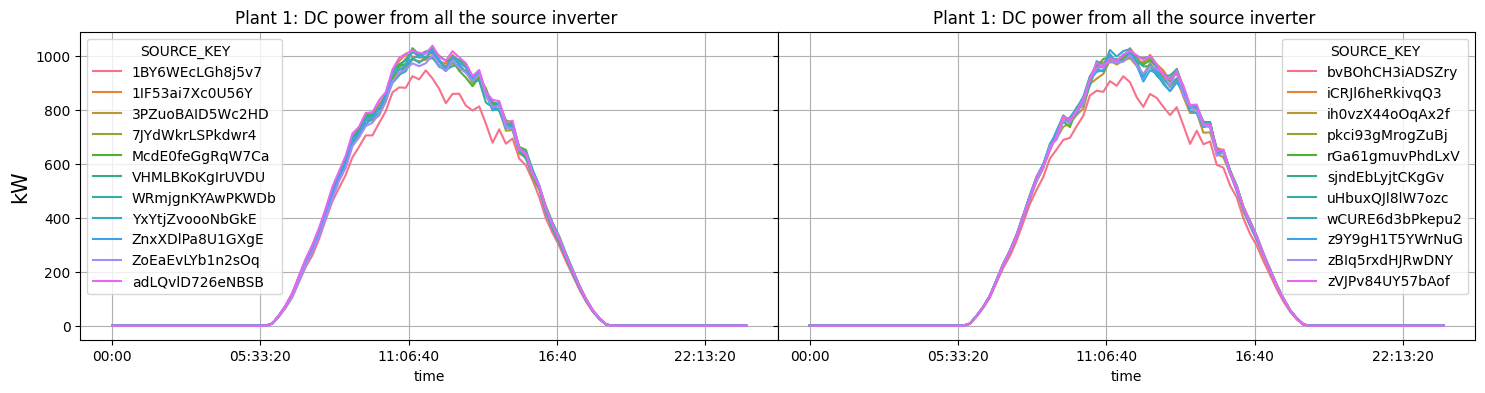

In [57]:
dc_gen1=plant1gen.copy()
dc_gen1['time']=dc_gen1['DATE_TIME'].dt.time
dc_gen1=dc_gen1.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()
cmap = sns.color_palette('husl',n_colors=12)
fig,axes = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(18,4), sharey=True)

# DC power from all the source inverter on generation file
dc_gen1.iloc[:,0:11].plot(ax=axes[0],color=cmap)
dc_gen1.iloc[:,11:22].plot(ax=axes[1],color=cmap)
for i, ax in enumerate(axes):
    ax.set_title(f'Plant 1: DC power from all the source inverter ')
    ax.set_ylabel('kW',color='black',fontsize=15)
    ax.grid()
fig.subplots_adjust(wspace=0)

There are noticeably two underperforming inverters of **bvBOhCH3iADSZry** and **1BY6WEcLGh8j5v7**, compare to the rest of inverters in the performance figures. they produce on average 282.899829 KW and 287.372098 kW on DC power respectively (see the table above) which are the least two performant of inverters among the 22 inverters from plant 1. It implies the dirtiness issues or panels seniority that may lead to the lower efficiency of power generation.[6]

**Inverter performance investigation on Plant 2**:  

We apply the same describe method on DC_POWER for each SORUCE_KEY for plant 2

In [58]:
# Compare performance of seperate source inverters based on DC_POWER produced on Plant 2
source_plant2 = plant2gen.groupby('SOURCE_KEY').describe()
source_plant2['DC_POWER'].head()

count        mean         std  min  25%    50%         75%  \
SOURCE_KEY                                                                     
4UPUqMRk7TRMgml  3195.0  277.760524  401.577356  0.0  0.0   0.00  506.596667   
81aHJ1q11NBPMrL  3259.0  230.796317  360.396646  0.0  0.0   0.00  411.333333   
9kRcWv60rDACzjR  3259.0  244.653027  369.796466  0.0  0.0   0.00  449.168810   
Et9kgGMDl729KT4  3195.0  188.230376  306.306939  0.0  0.0   0.00  300.943333   
IQ2d7wF4YD8zU1Q  2355.0  285.525112  397.457073  0.0  0.0  15.16  522.156667   

                         max  
SOURCE_KEY                    
4UPUqMRk7TRMgml  1419.840000  
81aHJ1q11NBPMrL  1382.206667  
9kRcWv60rDACzjR  1396.586667  
Et9kgGMDl729KT4  1202.640000  
IQ2d7wF4YD8zU1Q  1418.928571

In [59]:
# Extract least and most performant source inverter by mean DC_POWER
DC_source2 = source_plant2['DC_POWER']
source_keys2 = DC_source2.index.to_list()
means = DC_source2['mean']
least = np.argmin(means)
most = np.argmax(means)
print(f"The least performant source inverter ({source_keys2[least]}) produces {means[least]} kW on average.")
print(f"The most performant source inverter ({source_keys2[most]}) produces {means[most]} kW on average.")
mean_plant2 = plant2gen['DC_POWER'].mean()
print(f"The true mean DC power generation produces: {mean_plant2} kW")

The least performant source inverter (Quc1TzYxW2pYoWX) produces 173.2547289205317 kW on average.
The most performant source inverter (IQ2d7wF4YD8zU1Q) produces 285.5251121359178 kW on average.
The true mean DC power generation produces: 246.7019608878177 kW


In [60]:
print('The source inverter performing lower than the average for plant 2 :')
_ = DC_source2[DC_source2['mean'] < mean_plant2]
pd.DataFrame(_['mean']).sort_values('mean').round(2)

The source inverter performing lower than the average for plant 2 :


mean
SOURCE_KEY             
Quc1TzYxW2pYoWX  173.25
Et9kgGMDl729KT4  188.23
LYwnQax7tkwH5Cb  196.29
rrq4fwE8jgrTyWY  209.16
q49J1IKaHRwDQnt  226.16
81aHJ1q11NBPMrL  230.80
xoJJ8DcxJEcupym  240.93
9kRcWv60rDACzjR  244.65
WcxssY2VbP4hApt  245.27
LlT2YUhhzqhg5Sw  245.49

Compare to 6 out of 22 lower performant inverters for plant 1, there are 10 out of 22 inverters perform extraordinarily unsatisfied on plant 2. It indicates bigger issues on cleanliness or solar panels seniority. Nearly half of the inverters are considered for further maintenance check-up on plant 2.

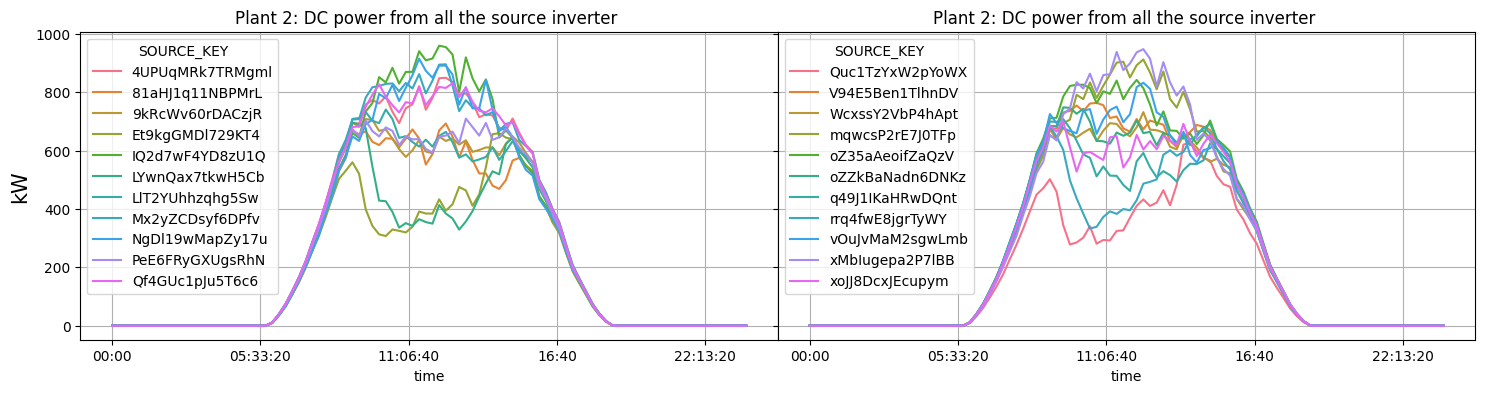

In [61]:
dc_gen2=plant2gen.copy()
dc_gen2['time']=dc_gen2['DATE_TIME'].dt.time
dc_gen2=dc_gen2.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack()
cmap = sns.color_palette('husl',n_colors=12)
fig,axes = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(18,4), sharey=True)

# DC power from all the source inverter on generation file
dc_gen2.iloc[:,0:11].plot(ax=axes[0],color=cmap)
dc_gen2.iloc[:,11:22].plot(ax=axes[1],color=cmap)
for i, ax in enumerate(axes):
    ax.set_title(f'Plant 2: DC power from all the source inverter ')
    ax.set_ylabel('kW',color='black',fontsize=15)
    ax.grid()
fig.subplots_adjust(wspace=0)

Compare to plant 1, DC power generation varies significantly on plant 2. Most of the inverters on plant 2 have very poor performance. Among all the inverters, the least underperforming inverters are **Quc1TzYxW2pYoWX**,**Et9kgGMDl729KT4**,**LYwnQax7tkwH5Cb**,**rrq4fwE8jgrTyWY**.The other inverters (from the table above) are also needed for further essential cleaniness and maintenance checkup.

**Power generation feature plots**

First we plot the data with each feature of power generation from both power plants, then we look at all the features on each plant, then examine the correlations between the data features.

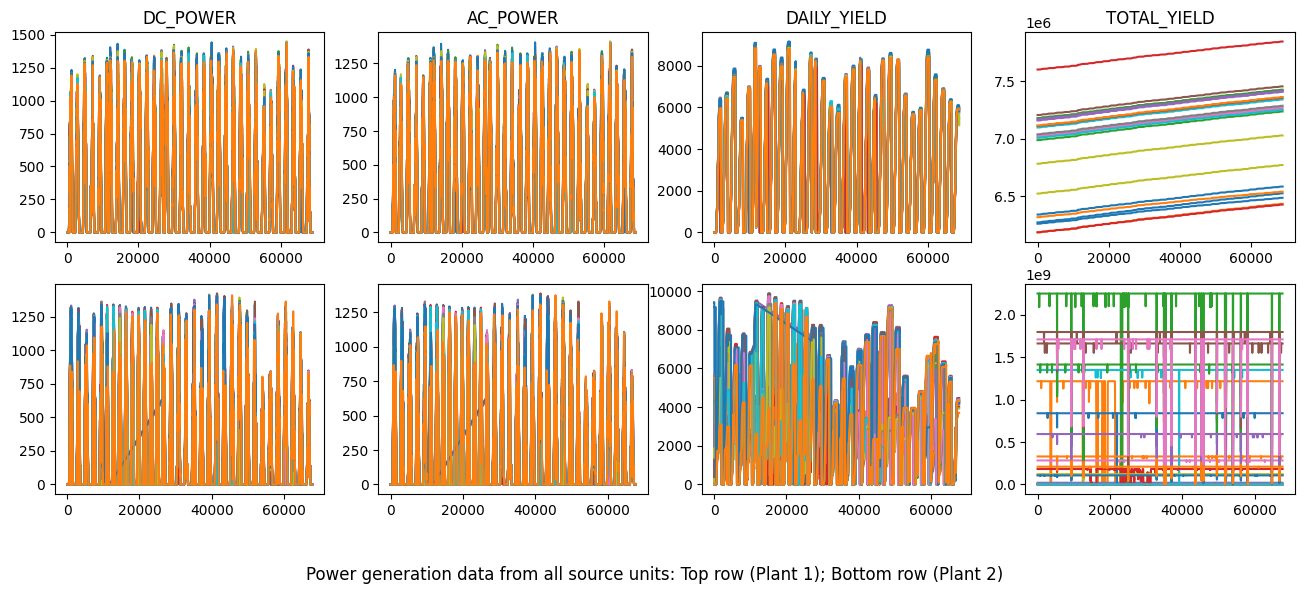

In [62]:
# Combine plots of the power generation features from all source inverters (Plant 1 and 2)
fig,axes = plt.subplots(ncols=4,nrows=2,dpi=100,figsize=(16,6))
features = plant1gen.columns.tolist()[2:6]
data1 = plant1gen.groupby('SOURCE_KEY')         # Plant 1
data2 = plant2gen.groupby('SOURCE_KEY')         # Plant 2
for i, feature in enumerate(features):
    data1[feature].plot(ax=axes[0,i])
    axes[0,i].set_title(feature)
    data2[feature].plot(ax=axes[1,i])

fig.suptitle('Power generation data from all source units: Top row (Plant 1); Bottom row (Plant 2)', y=-0.01)
fig.subplots_adjust(hspace=0.2)

From these figures, we can infer that
* Plant 1 has a slightly greater DC power output than Plant 2.
* The AC power production is relatively close between Plant 1 and Plant 2. 
* The power generation from Plant 1 is steadier than Plant 2. 
* There are greater numbers of inverters with AC and DC production under 1000 kW for Plant 2
* Plant 2 might have some faulty inverters records.  
(as anomalies shown in AC, DC power and daily yield, and irregular patterns shown in the total yield)

**Plant 1**

In [63]:
plant1gen.iloc[:,2:].describe().round(1)

DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
count   68778.0   68778.0      68778.0      68778.0
mean      314.7     307.8       3296.0    6978711.8
std       403.6     394.4       3145.2     416272.0
min         0.0       0.0          0.0    6183645.0
25%         0.0       0.0          0.0    6512002.5
50%        42.9      41.5       2658.7    7146685.0
75%       636.7     623.6       6274.0    7268705.9
max      1447.1    1411.0       9163.0    7846821.0

To get further we take a closer look at the power generation 
* over a day period (measuring hourly average production)
* over a month period (measuring daily avegar production).

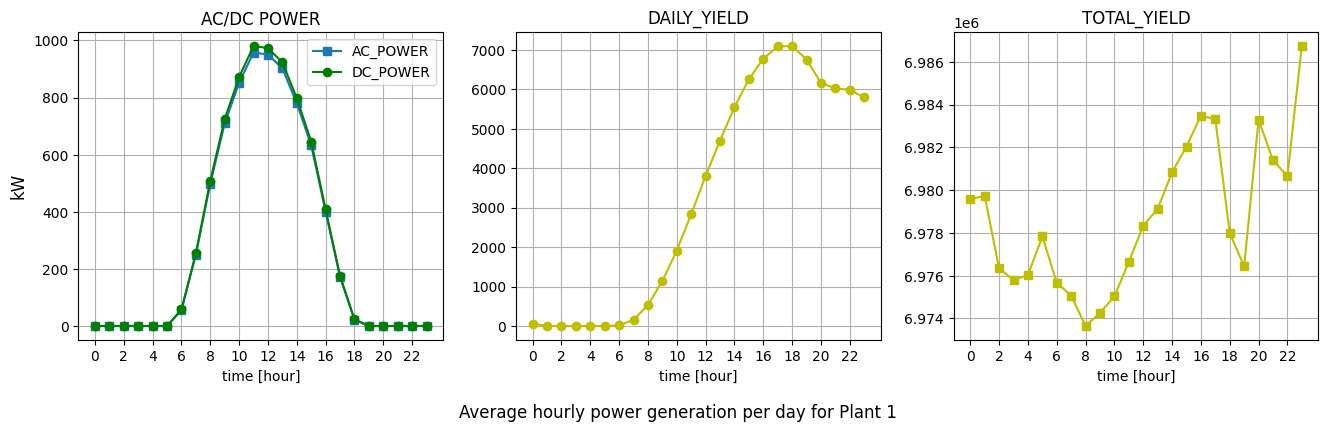

In [64]:
# Plots of hourly mean power distribution over a day period
df1 = plant1gen.copy()
daytime = 'time [hour]'
df1[daytime] = plant1gen['DATE_TIME'].dt.hour
if 'DATE_TIME' in df1.columns:
    df1.drop(columns='DATE_TIME', inplace=True)
features = plant1gen.columns.tolist()[2:6]
df1 = pd.pivot_table(df1, values=features, index=[daytime], aggfunc=np.mean)

fig,axes = plt.subplots(ncols=3,nrows=1,dpi=100,figsize=(16,4))
styles=['-s','-go','-yo','-ys']
df1[['AC_POWER', 'DC_POWER']].plot(style=styles[:2],ax=axes[0])
ax = axes[0]
ax.set_ylabel('kW',color='black',fontsize=12)
ax.set_title('AC/DC POWER')
ax.set_xticks(np.arange(0,24,2))
ax.grid()
ax.legend()
for i, feature in enumerate(features[-2:]):
    ax = axes[i+1]
    df1[feature].plot(ax=ax, style=styles[i+2])
    ax.set_title(feature)
    ax.set_xticks(np.arange(0,24,2))
    ax.grid()
    
_ = fig.suptitle('Average hourly power generation per day for Plant 1', y=-0.05)

Over a day period for Plant 1:
* After scalling, DC power and AC power has the same pattern. Plant 1 produces nearly equal amount of DC power and AC power on average.
* Both DC and AC power are at peak around 11.00 and 12.00, since it is the noon when sun at its highest point.
* The effective time for power generation mainly lies between 5.00 and 19.00. The power generation remains zero outside of these hours mainly due to no sunlight.
* Daily yield begins with zero until 6.00. However, it continues to increase after 6.00 and peak at 18.00, then it gradually decrease after 20.00.
* Total yield fluctuated during a day, neverthless it has rising trend from 8.00 and have a few peaks at 16.00, 20.00 and 23.00, while a few drops at 19.00 and 22.00

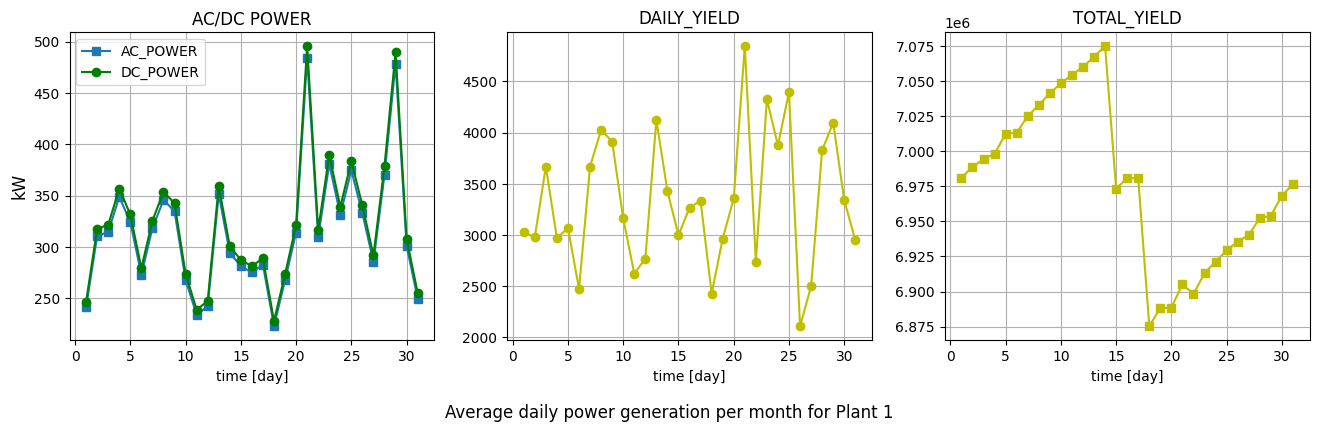

In [65]:
# Plots of daily mean power distribution over a month period
df1m = plant1gen.copy()
daytime = 'time [day]'
df1m[daytime] = plant1gen['DATE_TIME'].dt.day
if 'DATE_TIME' in df1m.columns:
    df1m.drop(columns='DATE_TIME', inplace=True)
features = plant1gen.columns.tolist()[2:6]
df1m = pd.pivot_table(df1m, values=features, index=[daytime], aggfunc=np.mean)

fig,axes = plt.subplots(ncols=3,nrows=1,dpi=100,figsize=(16,4))
styles=['-s','-go','-yo','-ys']
df1m[['AC_POWER', 'DC_POWER']].plot(style=styles[:2],ax=axes[0])
ax = axes[0]
ax.set_ylabel('kW',color='black',fontsize=12)
ax.set_title('AC/DC POWER')
ax.grid()
ax.legend()
for i, feature in enumerate(features[-2:]):
    ax = axes[i+1]
    df1m[feature].plot(ax=ax, style=styles[i+2])
    ax.set_title(feature)
    ax.grid()
    
_ = fig.suptitle('Average daily power generation per month for Plant 1', y=-0.05)


Over a month period for Plant 1:  
* DC and AC power remains the same pattern over a month.
* Both DC power and daily yield has the maximum production on day 21 and another great DC power production on day 29.
* There is corresponding peak on day 20 for daily yield where it is also the highest point on AC and DC power.
* The total yield continues to rise since the first day and it has the best average power generation record on day 14. During the period of day 15 and day 17, it tends to drop heavily. Starting from day 18, it has the pattern of power production growth once again. 

**Plant 2**

In [66]:
plant2gen.iloc[:,2:].describe().round(1)

DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD
count   67698.0   67698.0      67698.0  6.769800e+04
mean      246.7     241.3       3294.9  6.589448e+08
std       370.6     362.1       2919.4  7.296678e+08
min         0.0       0.0          0.0  0.000000e+00
25%         0.0       0.0        272.7  1.996494e+07
50%         0.0       0.0       2911.0  2.826276e+08
75%       446.6     438.2       5534.0  1.348495e+09
max      1420.9    1385.4       9873.0  2.247916e+09

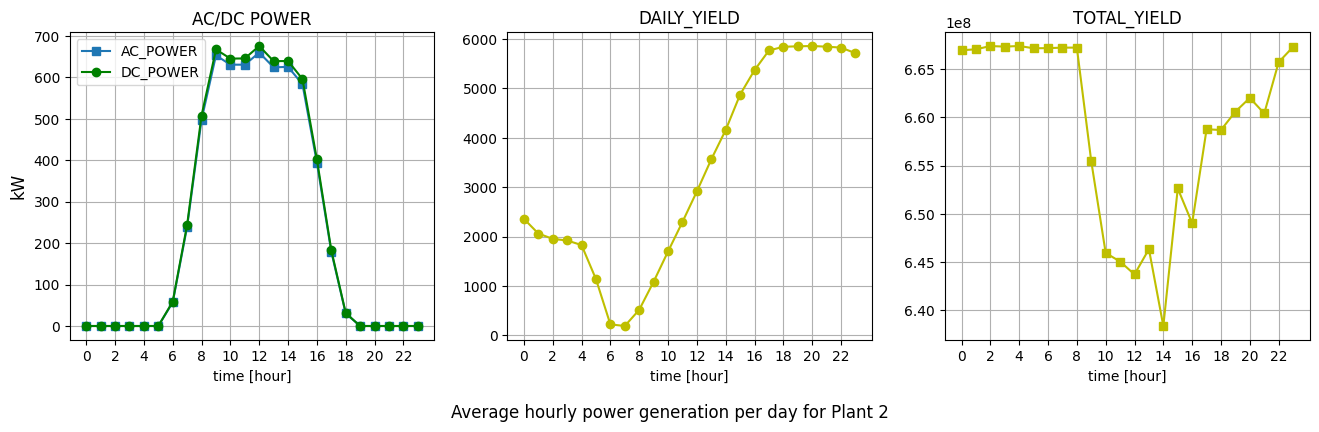

In [67]:
# Plots of hourly mean power distribution over a day period
df2 = plant2gen.copy()
daytime = 'time [hour]'
df2[daytime] = plant2gen['DATE_TIME'].dt.hour
if 'DATE_TIME' in df2.columns:
    df2.drop(columns='DATE_TIME', inplace=True)
features = plant2gen.columns.tolist()[2:6]
df2 = pd.pivot_table(df2, values=features, index=[daytime], aggfunc=np.mean)

fig,axes = plt.subplots(ncols=3,nrows=1,dpi=100,figsize=(16,4))
styles=['-s','-go','-yo','-ys']
df2[['AC_POWER', 'DC_POWER']].plot(style=styles[:2],ax=axes[0])
ax = axes[0]
ax.set_ylabel('kW',color='black',fontsize=12)
ax.set_title('AC/DC POWER')
ax.set_xticks(np.arange(0,24,2))
ax.grid()
ax.legend()
for i, feature in enumerate(features[-2:]):
    ax = axes[i+1]
    df2[feature].plot(ax=ax, style=styles[i+2])
    ax.set_title(feature)
    ax.set_xticks(np.arange(0,24,2))
    ax.grid()
    
_ = fig.suptitle('Average hourly power generation per day for Plant 2', y=-0.05)

Over a day period for Plant 2:
* DC power production appears to overlap AC power as we notice from Plant 1 as well. The method of describe used earlier shows that they have the same mean and quantiles.
* The effective time for power generation mainly lies between 5.00 and 19.00, the same as Plant 1. The power generation basically remains zero outside of these hours also due to no sunlight. 
* The average daily yield appears to be lower in the early morning hours but rises steadily from 6.00 until it attains its highest at 18.00, then it reamins the same values until the end of day.
* The average of total yield tends to be highest in the early hours of the day. It drops as the sun rises fom 8.00 and reaches the bottom at 14.00. After 14.00, it begins to increase consistantly which may reflect the energy consumption pattern. 

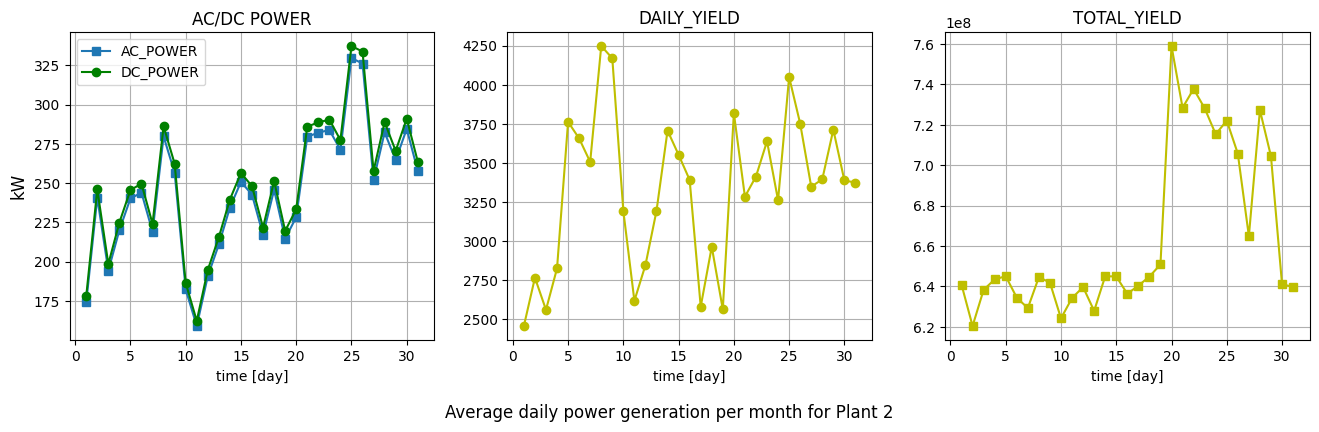

In [68]:
# Plots of daily mean power distribution over a month period
df2m = plant2gen.copy()
daytime = 'time [day]'
df2m[daytime] = plant2gen['DATE_TIME'].dt.day
if 'DATE_TIME' in df2m.columns:
    df2m.drop(columns='DATE_TIME', inplace=True)
features = plant2gen.columns.tolist()[2:6]
df2m = pd.pivot_table(df2m, values=features, index=[daytime], aggfunc=np.mean)

fig,axes = plt.subplots(ncols=3,nrows=1,dpi=100,figsize=(16,4))
styles=['-s','-go','-yo','-ys']
df2m[['AC_POWER', 'DC_POWER']].plot(style=styles[:2],ax=axes[0])
ax = axes[0]
ax.set_ylabel('kW',color='black',fontsize=12)
ax.set_title('AC/DC POWER')
ax.grid()
ax.legend()
for i, feature in enumerate(features[-2:]):
    ax = axes[i+1]
    df2m[feature].plot(ax=ax, style=styles[i+2])
    ax.set_title(feature)
    ax.grid()
    
_ = fig.suptitle('Average daily power generation per month for Plant 2', y=-0.05)

Over a month period for Plant 2:  
* AC power and DC power output remains the same trend.
* Both AC and DC power has the maximum average production on day 25 and the minimum average production on day 11.
* All features fluctuated to a great extend over a month's time.  
* Daily yield varies significantly in a month period. However, we can see that day 8 and 9 has the best average of daily yield records and a steady trend between the period of day 20 and day 30, compare to previous days in a month.
* The average of total yield varies dramatically and it remains extremely low before day 20 and it rapidly peaks at day 20. Afterwards it gradually decreases again.


**Power generation feature correlation**

In [69]:
# Measure the correlation between float features of power generation
print('Correlation of float features of power generation:')
pd.concat([plant1gen.iloc[:,2:6].corr(), # Plant1
plant2gen.iloc[:,2:6].corr()]) # Plant2

Correlation of float features of power generation:


DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
DC_POWER     1.000000  0.999996     0.082284     0.003815
AC_POWER     0.999996  1.000000     0.082234     0.003804
DAILY_YIELD  0.082284  0.082234     1.000000     0.009867
TOTAL_YIELD  0.003815  0.003804     0.009867     1.000000
DC_POWER     1.000000  0.999997     0.005593     0.004528
AC_POWER     0.999997  1.000000     0.005395     0.004533
DAILY_YIELD  0.005593  0.005395     1.000000    -0.068472
TOTAL_YIELD  0.004528  0.004533    -0.068472     1.000000

We observe a *strong positive* correlation between DC_POWER and AC_POWER; a *weak negative correlation* between DC_POWER, DAILY_YIELD and TOTAL_YIELD. The remain correlations are nearly zero. 

#### 2.3 Analyzing the Weather Sensor data
First we plot the data with all the feature from both power plants, then we take a closer look on each plant and examine the correlations between the data features.

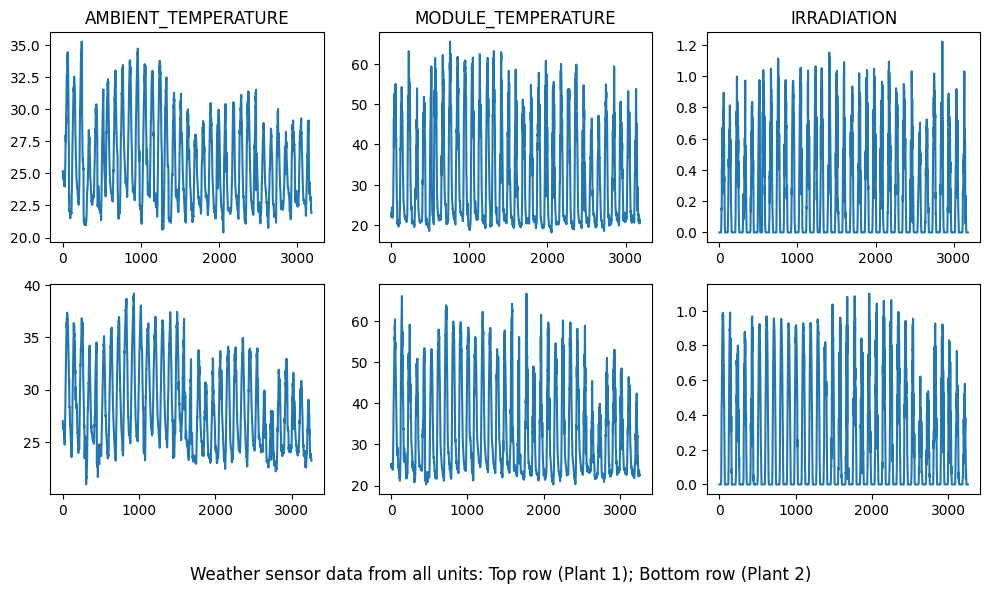

In [70]:
# Plots of float features from both sensor units: Weather sensor data (Plant 1 and 2)
fig,axes = plt.subplots(ncols=3,nrows=2,dpi=100,figsize=(12,6))
features = plant1wea.columns.tolist()[2:-1]
for i, feature in enumerate(features):
    plant1wea[feature].plot(ax=axes[0,i])  # Plant 1
    axes[0,i].set_title(feature)                 
    plant2wea[feature].plot(ax=axes[1,i]) # Plant 2

fig.suptitle('Weather sensor data from all units: Top row (Plant 1); Bottom row (Plant 2)', y=-0.01)
fig.subplots_adjust(hspace=0.2)

There is little overall difference in the weather data from both plants. The data fluctuates significantly and it is diffcult to interpret in this form. Therefore we need to look at precise hourly or daily average feature plots to extract useful information.

From the comparison of weather sensor data, we notice: 
* Plant 1 has smaller range of ambient temperature between 20.4 to 35.25 degree, while plant 2 has a slightly bigger range between roughly 20.94 to 39.18 degree.(see the table from describe method below).
* Module temperature for Plant 1 tends to be generally balanced than Plant 2. The range of module temperature for Plant 1 is between 18.14 and 65.55, while it is between 20.27 and 66.64 for Plant 2.
* Irradiation for Plant 1 appears to have slight higher upper boundary 1.22 than Plant 2 at 1.10. It may explain the reason why the amount of power generation is greater for Plant 1 than Plant 2. Since the amount of irradiation is a great indicator to power generation[6]

**Feature plots and correlation**

**Plant 1**

In [71]:
plant1wea.iloc[:,2:].describe().round(2)

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count              3182.00             3182.00      3182.00
mean                 25.53               31.09         0.23
std                   3.35               12.26         0.30
min                  20.40               18.14         0.00
25%                  22.71               21.09         0.00
50%                  24.61               24.62         0.02
75%                  27.92               41.31         0.45
max                  35.25               65.55         1.22

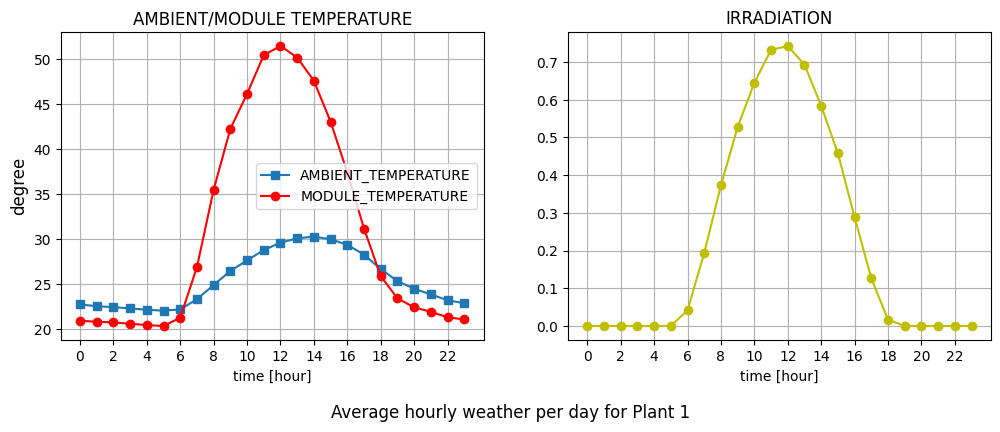

In [72]:
# Plots of hourly mean weather distribution over a day period
df1w = plant1wea.copy()
daytime = 'time [hour]'
df1w[daytime] = plant1wea['DATE_TIME'].dt.hour
if 'DATE_TIME' in df1w.columns:
    df1w.drop(columns='DATE_TIME', inplace=True)
plant1wea.columns
features = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
df1w = pd.pivot_table(df1w, values=features, index=[daytime], aggfunc=np.mean)

fig,axes = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(12,4))
df1w[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].plot(style=['-s','-ro'],ax=axes[0])
ax = axes[0]
ax.set_ylabel('degree',color='black',fontsize=12)
ax.set_title('AMBIENT/MODULE TEMPERATURE')
ax.set_xticks(np.arange(0,24,2))
ax.grid()
ax.legend()
for i, feature in enumerate(features[-1:]):
    ax = axes[i+1]
    df1w[feature].plot(ax=ax, style='yo-')
    ax.set_title(feature)
    ax.set_xticks(np.arange(0,24,2))
    ax.grid()
    
_ = fig.suptitle('Average hourly weather per day for Plant 1', y=-0.05)

Over a day period for Plant 1: 
* Both module temperature and irradiation tend to increase from morning time 5.00, they reaches its peak at 12.00 and they tend to drop after 12.00.
* Ambient temperature tends to rise from morning 6.00 and peak at 14.00. It decreases slightly later than module temperature according to the common sense.
* Irradiation appears to have the same effective time from 5.00 to 19.00 that is highly corresponding to trend of average DC and AC power generation.

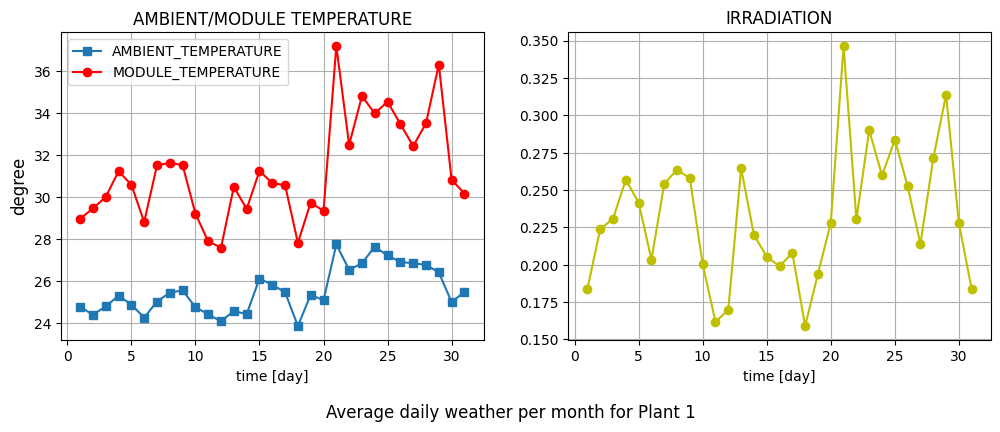

In [73]:
# Plots of daily mean weather distribution over a month period
df1wm = plant1wea.copy()
daytime = 'time [day]'
df1wm[daytime] = plant1wea['DATE_TIME'].dt.day
if 'DATE_TIME' in df1wm.columns:
    df1wm.drop(columns='DATE_TIME', inplace=True)
plant1wea.columns
features = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
df1wm = pd.pivot_table(df1wm, values=features, index=[daytime], aggfunc=np.mean)

fig,axes = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(12,4))
df1wm[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].plot(style=['-s','-ro'],ax=axes[0])
ax = axes[0]
ax.set_ylabel('degree',color='black',fontsize=12)
ax.set_title('AMBIENT/MODULE TEMPERATURE')
ax.grid()
ax.legend()
for i, feature in enumerate(features[-1:]):
    ax = axes[i+1]
    df1wm[feature].plot(ax=ax, style='yo-')
    ax.set_title(feature)
    ax.grid()
    
_ = fig.suptitle('Average daily weather per month for Plant 1', y=-0.05)


Over a month period for Plant 1: 
* Module temperature and ambient temperature have similar trend, while the module temperature has a wider temperature range and higher temperature values than ambient temperature. 
* Evidently all three features peak at day 21. It is inevitable to be a perfect weather on this day during a month and it proves why the AC,DC power and daily yield has the maximum power output on day 21.  
* Irradiation fluctuated significantly over a month. However, it is noticeable that both module temperature and irradiation have higher degree records on day 21 and day 28 and that is consistent with AC and DC power.

**Plant 2**

In [74]:
plant2wea.iloc[:,2:].describe().round(2)

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count              3259.00             3259.00      3259.00
mean                 28.07               32.77         0.23
std                   4.06               11.34         0.31
min                  20.94               20.27         0.00
25%                  24.60               23.72         0.00
50%                  26.98               27.53         0.02
75%                  31.06               40.48         0.44
max                  39.18               66.64         1.10

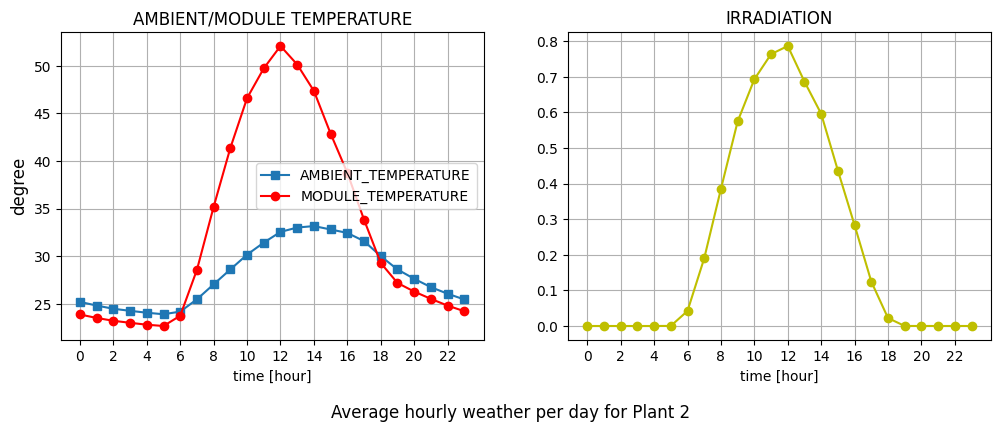

In [75]:
# Plots of hourly mean weather distribution over a day period
df2w = plant2wea.copy()
daytime = 'time [hour]'
df2w[daytime] = plant2wea['DATE_TIME'].dt.hour
if 'DATE_TIME' in df2w.columns:
    df2w.drop(columns='DATE_TIME', inplace=True)
plant2wea.columns
features = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
df2w = pd.pivot_table(df2w, values=features, index=[daytime], aggfunc=np.mean)

fig,axes = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(12,4))
df2w[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].plot(style=['-s','-ro'],ax=axes[0])
ax = axes[0]
ax.set_ylabel('degree',color='black',fontsize=12)
ax.set_title('AMBIENT/MODULE TEMPERATURE')
ax.set_xticks(np.arange(0,24,2))
ax.grid()
ax.legend()
for i, feature in enumerate(features[-1:]):
    ax = axes[i+1]
    df2w[feature].plot(ax=ax, style='yo-')
    ax.set_title(feature)
    ax.set_xticks(np.arange(0,24,2))
    ax.grid()
    
_ = fig.suptitle('Average hourly weather per day for Plant 2', y=-0.05)

Over a day period for Plant 2: 
* Both module temperature and irradiation tend to increase from morning time 5.00, they reaches its peak at 12.00 and they tend to drop after 12.00, the similar trend as Plant 1.
* Ambient temperature tends to rise from morning 5.00 and peak at 12.00. It reaches its peak earlier than Plant 1. It decreases slightly later than module temperature.
* Irradiation appears to have the same effective time from 5.00 to 19.00 that is highly corresponding to trend of average DC and AC power generation, the same trend as Plant 1.

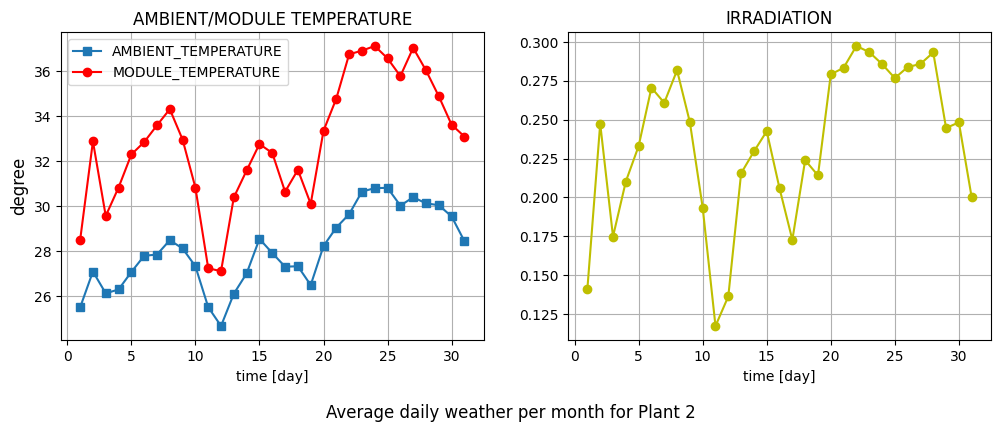

In [76]:
# Plots of daily mean weather distribution over a month period
df2wm = plant2wea.copy()
daytime = 'time [day]'
df2wm[daytime] = plant2wea['DATE_TIME'].dt.day
if 'DATE_TIME' in df2wm.columns:
    df2wm.drop(columns='DATE_TIME', inplace=True)
plant2wea.columns
features = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
df2wm = pd.pivot_table(df2wm, values=features, index=[daytime], aggfunc=np.mean)

fig,axes = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(12,4))
df2wm[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].plot(style=['-s','-ro'],ax=axes[0])
ax = axes[0]
ax.set_ylabel('degree',color='black',fontsize=12)
ax.set_title('AMBIENT/MODULE TEMPERATURE')
ax.grid()
ax.legend()
for i, feature in enumerate(features[-1:]):
    ax = axes[i+1]
    df2wm[feature].plot(ax=ax, style='yo-')
    ax.set_title(feature)
    ax.grid()
    
_ = fig.suptitle('Average daily weather per month for Plant 2', y=-0.05)

Over a month period for Plant 2: 
* Module temperature and ambient temperature have almost synchronized trends, while the module temperature has a wider temperature range and higher temperature values than ambient temperature. Both feature temperatures hit at bottom on day 12 and there is clearly an rising trend between day 20 and day 30.
* Evidently all three features have the same increasing trend between day 20 and 30. It is inevitable to be wonderful weather during these days in a month and it proves why the AC,DC power and daily yield all has the increased power output during this period.  
* Irradiation fluctuated significantly over a month. However, it is also noticeable that all three features have
its corresponding lowest on day 11 and rising higher temperatures between day 20 and 20 and those are consistent with AC and DC power.

In [77]:
# Measure the correlation between float features of weather sensor
print('Correlation of float features of Weather Sensor:')
pd.concat([plant1wea.iloc[:,-3:].corr(), # Plant1
plant2wea.iloc[:,-3:].corr()]) # Plant2

Correlation of float features of Weather Sensor:


MODULE_TEMPERATURE  IRRADIATION
MODULE_TEMPERATURE            1.000000     0.961566
IRRADIATION                   0.961566     1.000000
MODULE_TEMPERATURE            1.000000     0.946886
IRRADIATION                   0.946886     1.000000

For the Weather Sensor data we observe that each feature is very strongly correlated with the other. 

#### 2.4 Analyzing the combined of power generation and weather sensor data

At this point, it is reasonable to *combine* the the power generation and weather sensor data sets into one single data set for both power plant. We start with plant 1, then do the same to plant 2 for correlation.

In [78]:
#Dropping the splitted Date Column
plant1gen = plant1gen.drop(columns = ['Date'])
plant2gen = plant2gen.drop(columns = ['Date'])
plant1wea = plant1wea.drop(columns = ['Date'])
plant2wea = plant2wea.drop(columns = ['Date'])

**Plant 1**

In [79]:
# create a new dataframe of combined the power generation and weather sensor data for plant 1
print('combined of all the features for plant 1:')
df_plant1 = pd.merge(plant1gen, plant1wea.drop(columns = ['SOURCE_KEY']), on='DATE_TIME')
pd.concat([df_plant1.head(),
df_plant1.tail()])
df_plant1.describe()

combined of all the features for plant 1:


DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count  68774.000000  68774.000000  68774.000000  6.877400e+04   
mean     314.717745    307.778375   3295.834644  6.978728e+06   
std      403.644183    394.394865   3145.220597  4.162707e+05   
min        0.000000      0.000000      0.000000  6.183645e+06   
25%        0.000000      0.000000      0.000000  6.512007e+06   
50%       42.857143     41.450000   2658.473214  7.146685e+06   
75%      636.546875    623.561161   6274.000000  7.268751e+06   
max     1447.112500   1410.950000   9163.000000  7.846821e+06   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   IRRADIATION  
count         68774.000000        68774.000000  68774.000000  
mean             25.558521           31.244997      0.232305  
std               3.361300           12.308283      0.301948  
min              20.398505           18.140415      0.000000  
25%              22.724491           21.123944      0.000000  
50%              24.670178           24.818984      0.031620  
75%              27.960429           41.693659      0.454880  
max              35.252486           65.545714      1.221652

**DC Power and Daily Yield in Plant 01**

In [80]:
temp_gen1=plant1gen.copy()

temp_gen1['time'] = temp_gen1['DATE_TIME'].dt.time
temp_gen1['day'] = temp_gen1['DATE_TIME'].dt.date

temp_wea1=plant1wea.copy()

temp_wea1['time'] = temp_wea1['DATE_TIME'].dt.time
temp_wea1['day'] = temp_wea1['DATE_TIME'].dt.date

temp_cols=temp_gen1.groupby(['time','day'])['DC_POWER'].mean().unstack()

/usr/local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/tools.py:229: UserWarning: When passing multiple axes, layout keyword is ignored.
  warnings.warn(
/var/folders/80/gvn13k_j4flbt1wl6gwsmz4w0000gn/T/ipykernel_37256/980146781.py:2: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  temp_gen1.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True, subplots=True,layout=(17,2),figsize=(20,30),ax=ax)


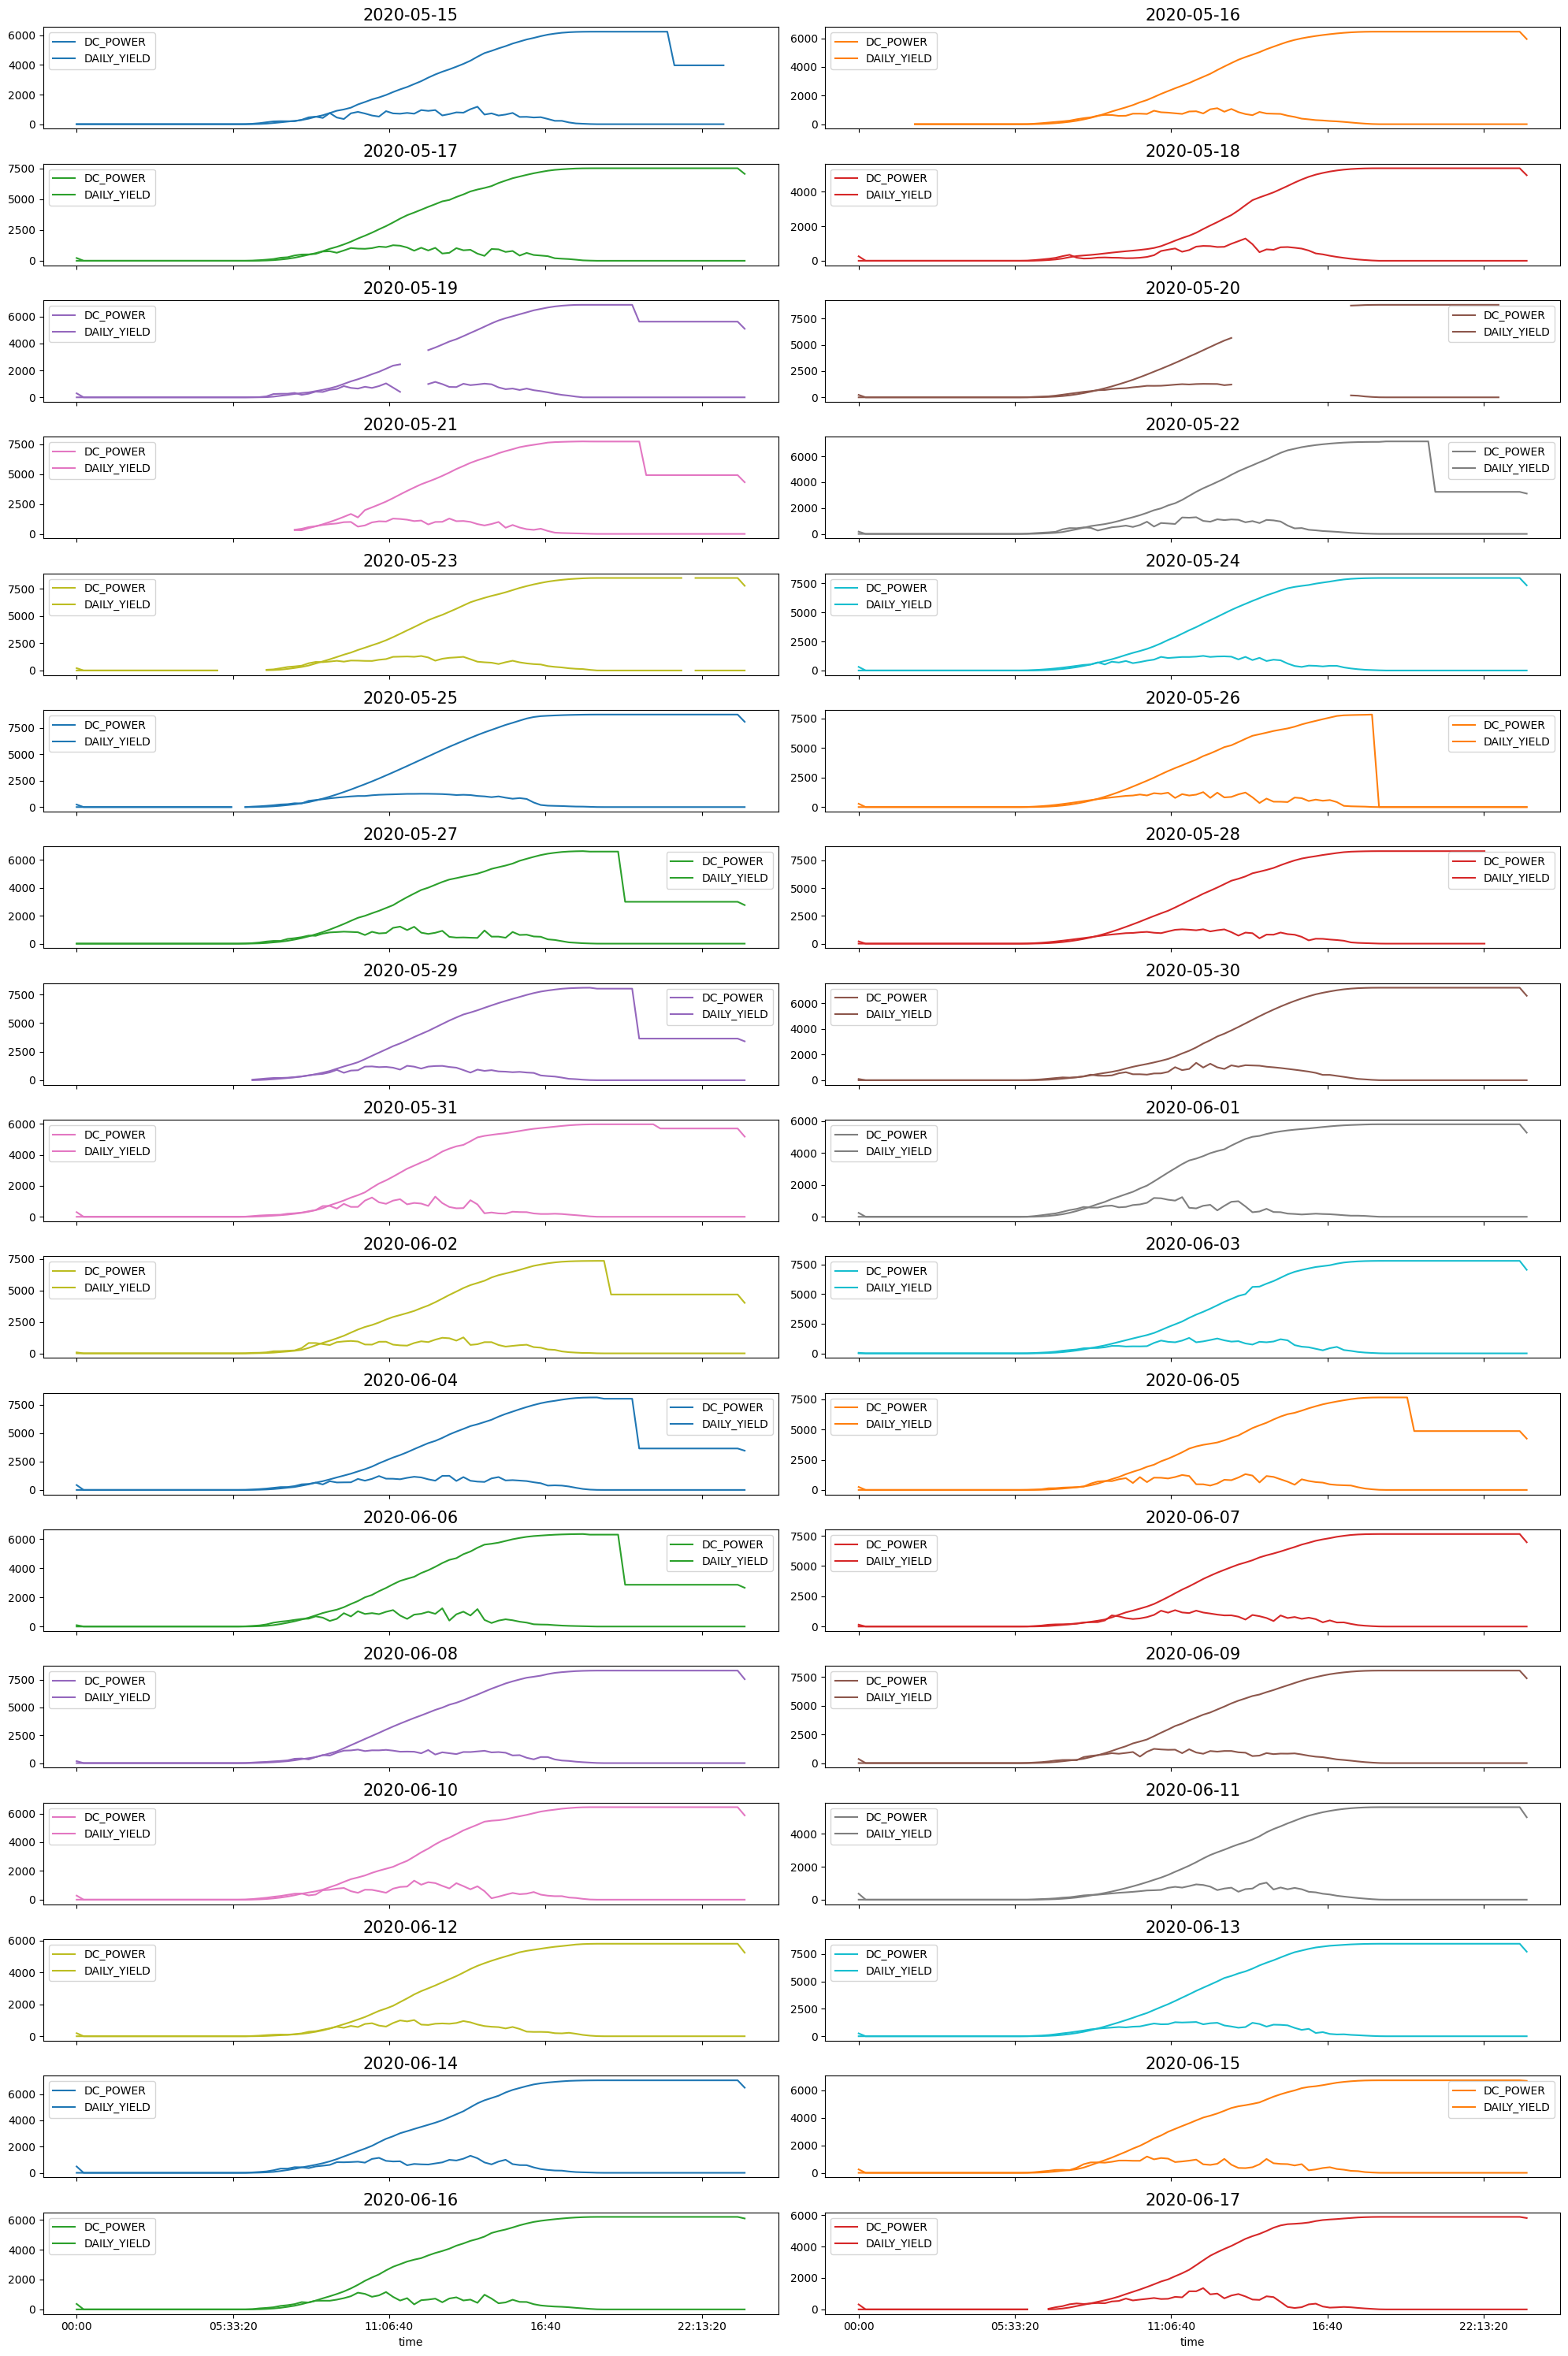

In [81]:
ax = temp_gen1.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True, subplots=True,layout=(17,2),figsize=(20,30))
temp_gen1.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True, subplots=True,layout=(17,2),figsize=(20,30),ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(temp_cols.columns[i], size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

***Observations***

From the graph, we can see that there are some gaps. This may cause for various reason. But for now, we can assume that either the inverters or the whole plant was facing some kind of technical problems. We can be sure by further analysing weather sensor data. 

**Module temperature and Ambient Temperature in Plant 1**

/usr/local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/tools.py:229: UserWarning: When passing multiple axes, layout keyword is ignored.
  warnings.warn(


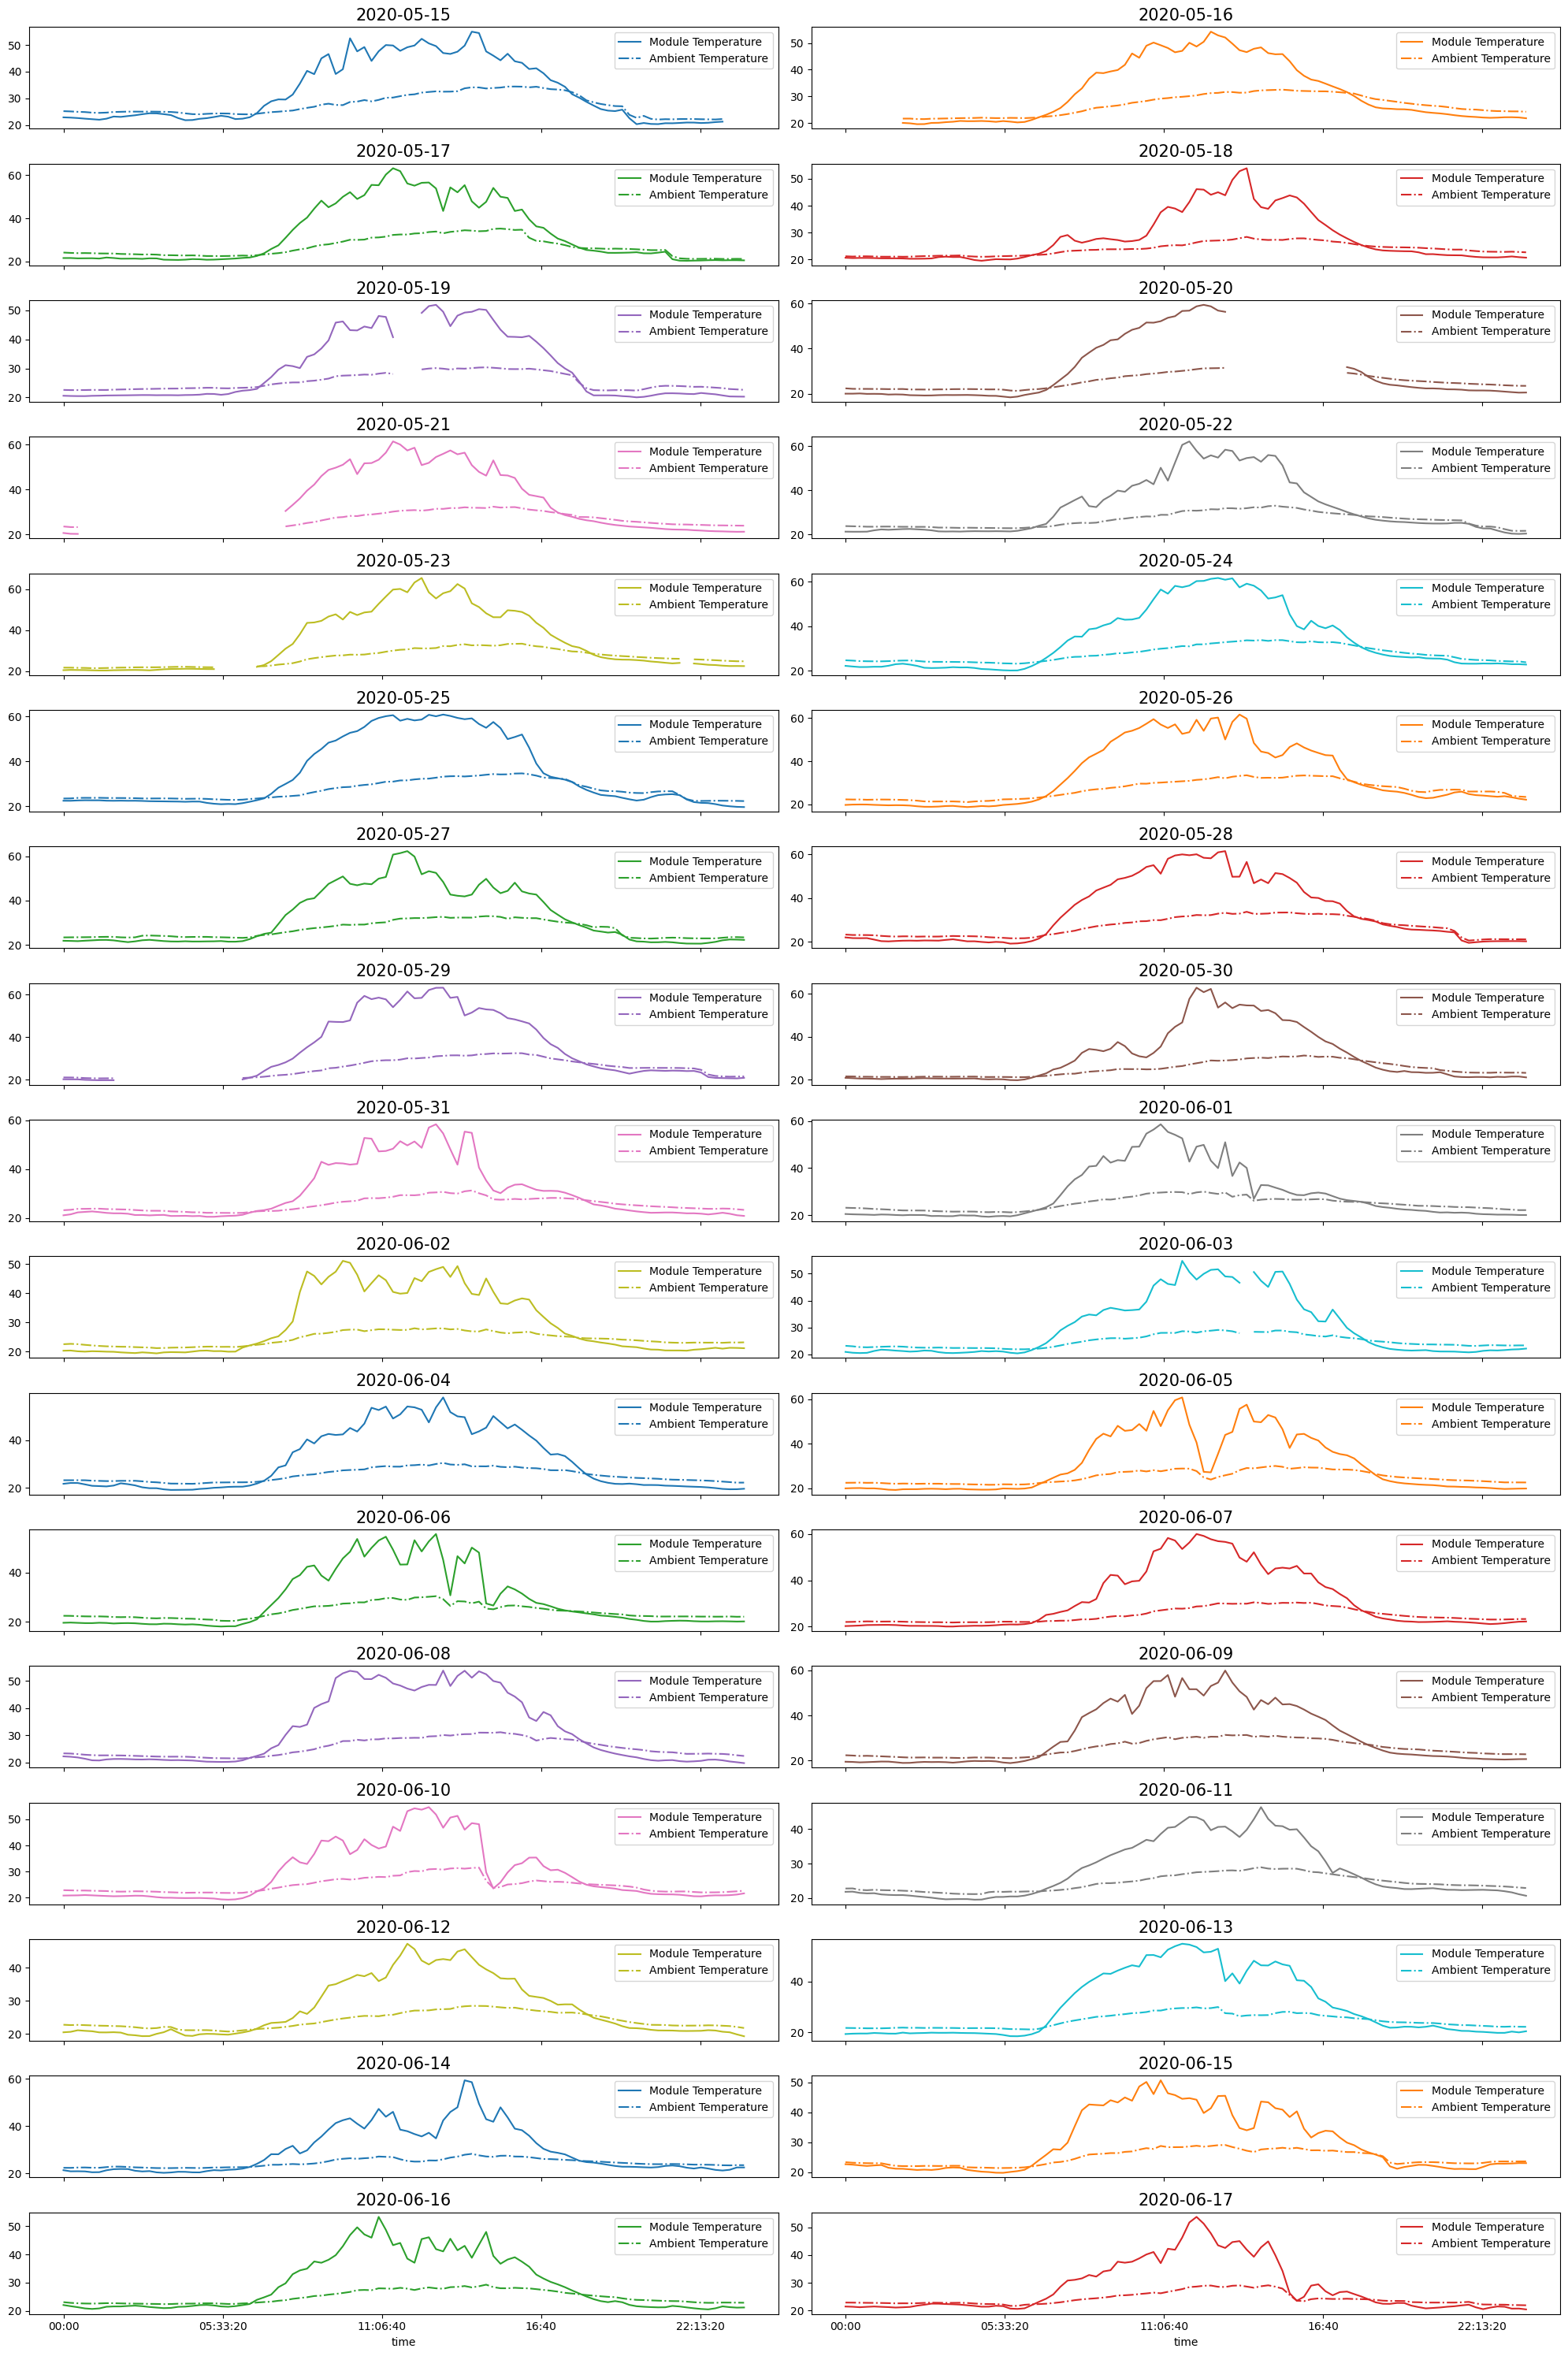

In [82]:
ax= temp_wea1.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
temp_wea1.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(temp_cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

***Observations***

By comparing these two plots, we can say that there was some technical problem in the whole plant 1 on those specific dates., and that's why we have those gap in graph. Those gap are available on same date on both graph at almost same time. For example, we can check the graph of 2020-05-19 and 2020-05-20 for comparison.

**Plant 2**

In [83]:
# create a new dataframe of combined the power generation and weather sensor data for plant 2
print('combined of all the features for plant 2:')
df_plant2 = pd.merge(plant2gen, plant2wea.drop(columns = ['SOURCE_KEY']), on='DATE_TIME')
pd.concat([df_plant2.head(),
df_plant2.tail()])
df_plant2.describe()

combined of all the features for plant 2:


DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count  67698.000000  67698.000000  67698.000000  6.769800e+04   
mean     246.701961    241.277825   3294.890295  6.589448e+08   
std      370.569597    362.112118   2919.448386  7.296678e+08   
min        0.000000      0.000000      0.000000  0.000000e+00   
25%        0.000000      0.000000    272.750000  1.996494e+07   
50%        0.000000      0.000000   2911.000000  2.826276e+08   
75%      446.591667    438.215000   5534.000000  1.348495e+09   
max     1420.933333   1385.420000   9873.000000  2.247916e+09   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   IRRADIATION  
count         67698.000000        67698.000000  67698.000000  
mean             27.986756           32.607233      0.229204  
std               4.021294           11.226446      0.309365  
min              20.942385           20.265123      0.000000  
25%              24.570349           23.685627      0.000000  
50%              26.910352           27.433723      0.018554  
75%              30.912601           40.019036      0.431027  
max              39.181638           66.635953      1.098766

**DC Power and Daily Yield in Plant 2**

In [84]:
temp_gen2=plant2gen.copy()

temp_gen2['time'] = temp_gen2['DATE_TIME'].dt.time
temp_gen2['day'] = temp_gen2['DATE_TIME'].dt.date

temp_wea2=plant2wea.copy()

temp_wea2['time'] = temp_wea2['DATE_TIME'].dt.time
temp_wea2['day'] = temp_wea2['DATE_TIME'].dt.date

temp_cols2=temp_gen2.groupby(['time','day'])['DC_POWER'].mean().unstack()

/usr/local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/tools.py:229: UserWarning: When passing multiple axes, layout keyword is ignored.
  warnings.warn(
/var/folders/80/gvn13k_j4flbt1wl6gwsmz4w0000gn/T/ipykernel_37256/3561069652.py:2: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  temp_gen2.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True, subplots=True,layout=(17,2),figsize=(20,30),ax=ax)


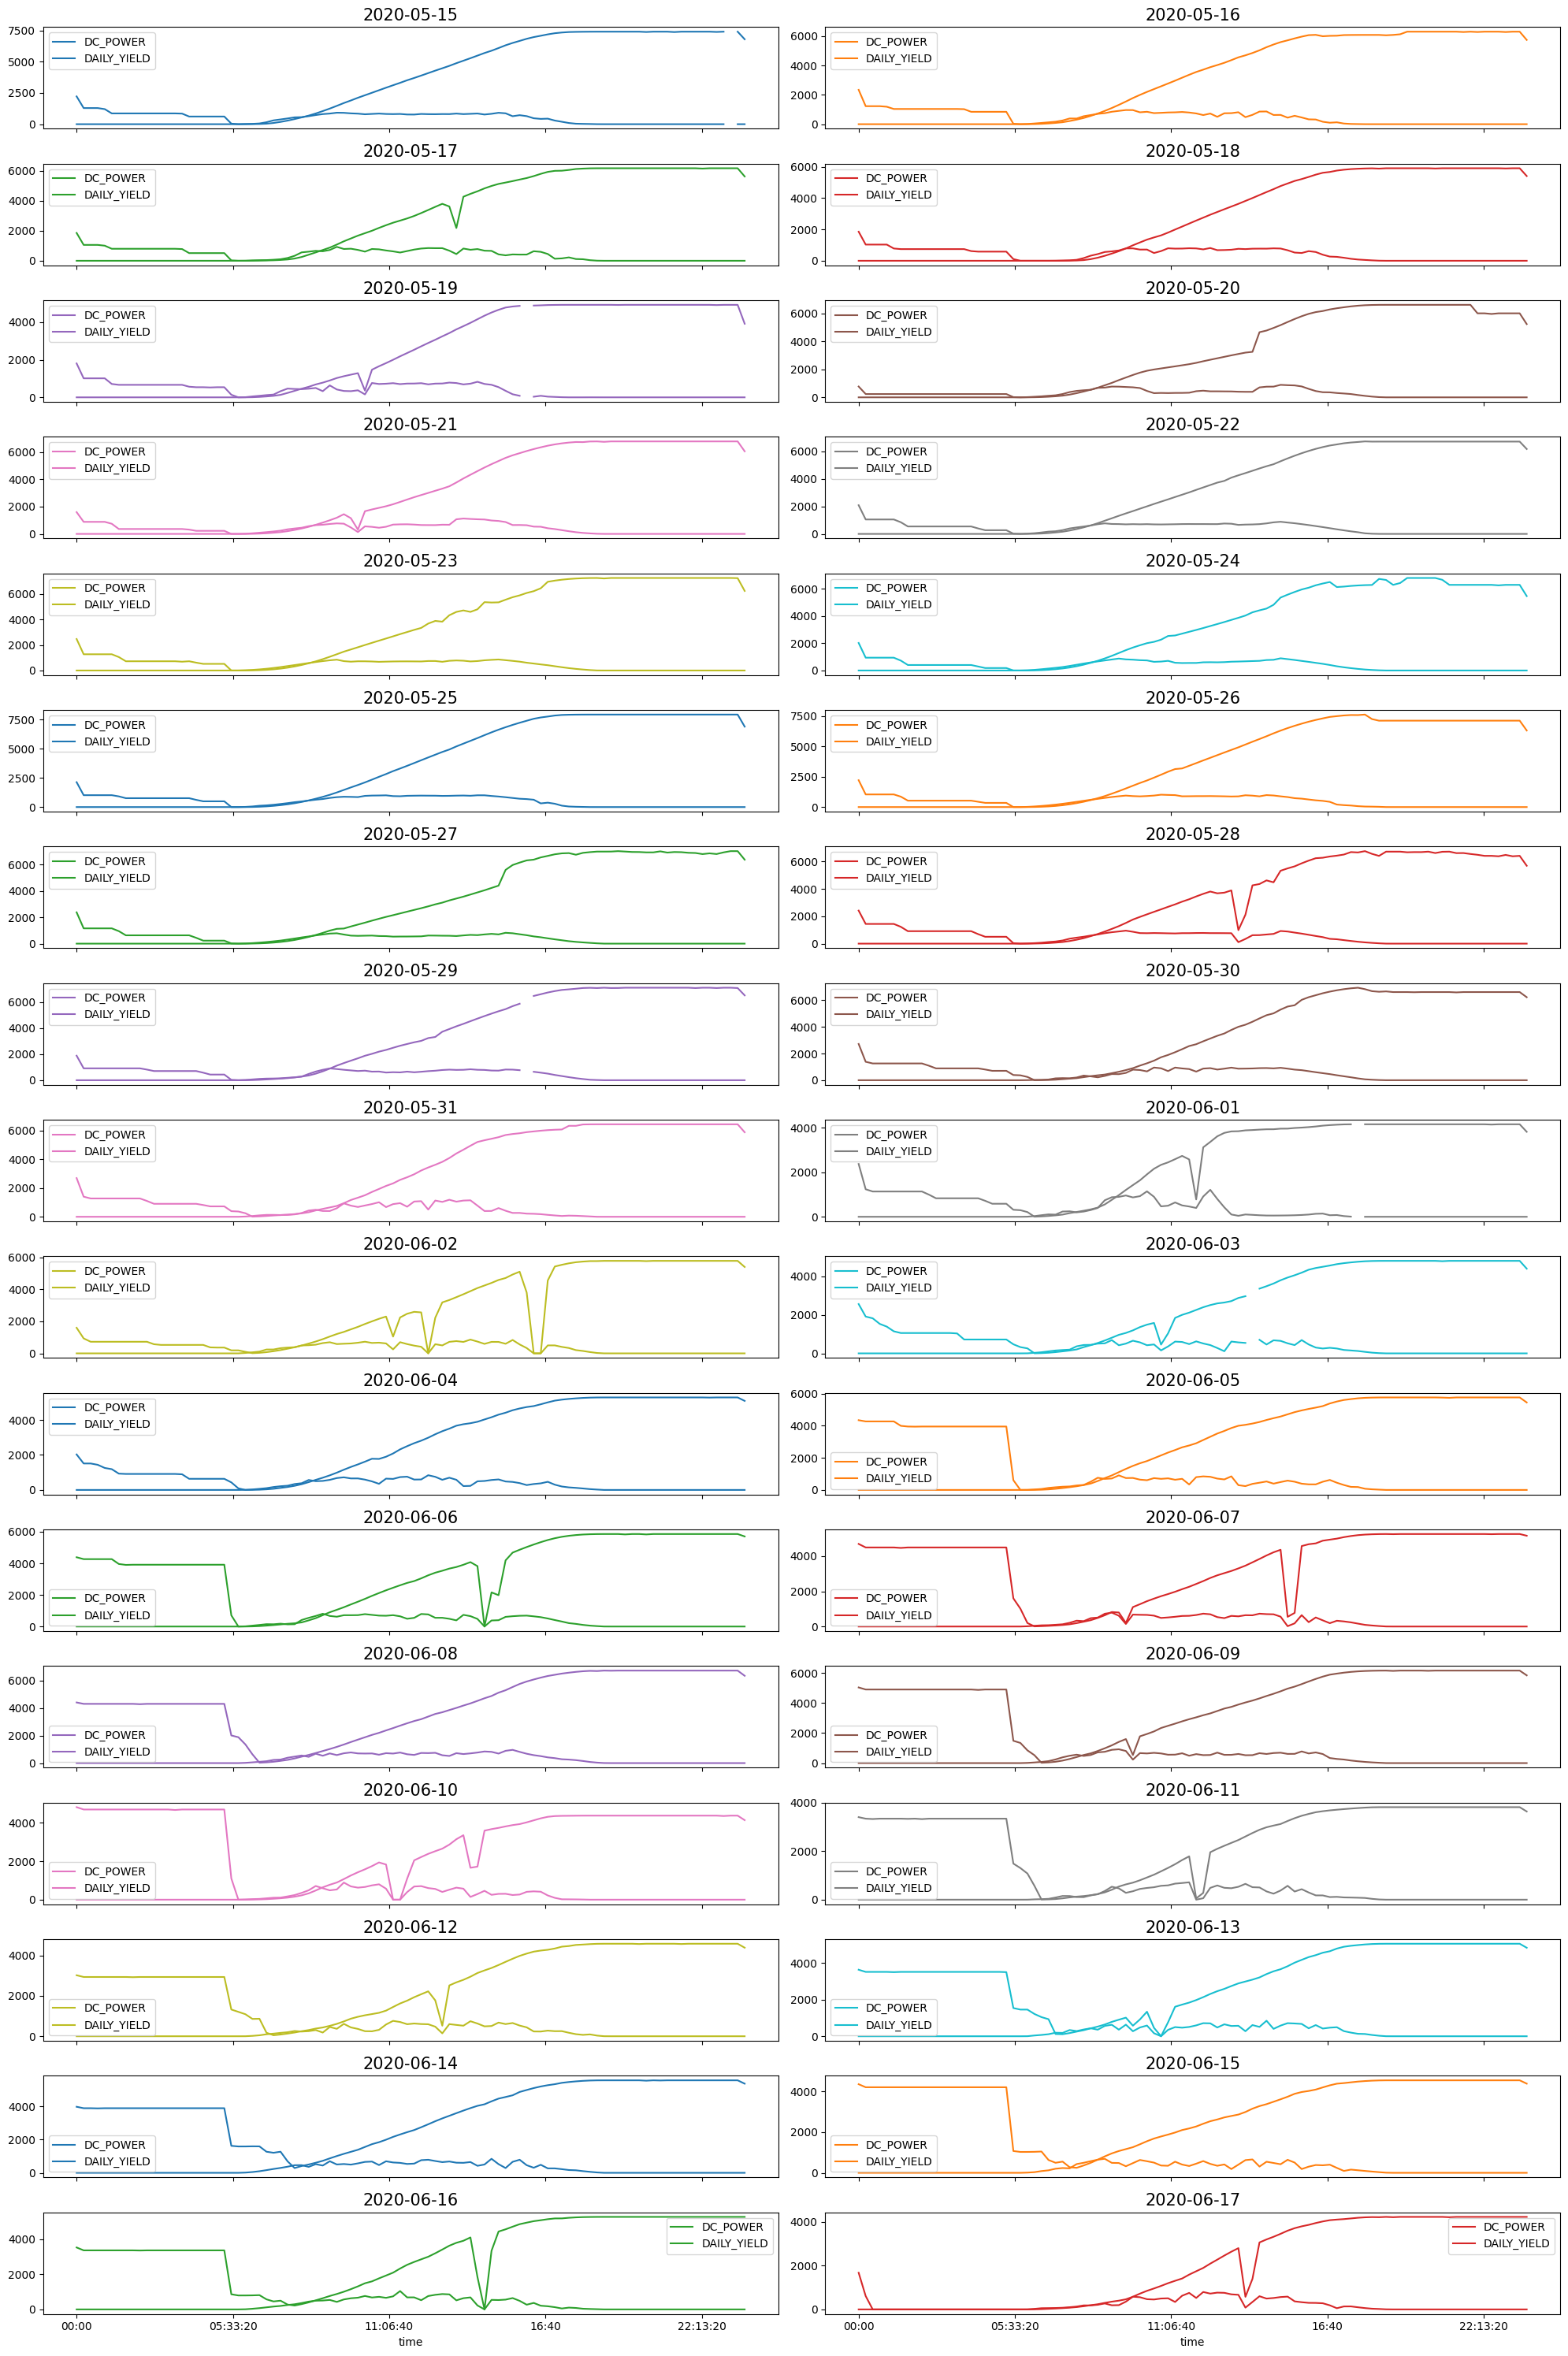

In [85]:
ax = temp_gen2.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex=True, subplots=True,layout=(17,2),figsize=(20,30))
temp_gen2.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex=True, subplots=True,layout=(17,2),figsize=(20,30),ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(temp_cols2.columns[i], size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

**Module temperature and Ambient Temperature in Plant 2**

/usr/local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/tools.py:229: UserWarning: When passing multiple axes, layout keyword is ignored.
  warnings.warn(


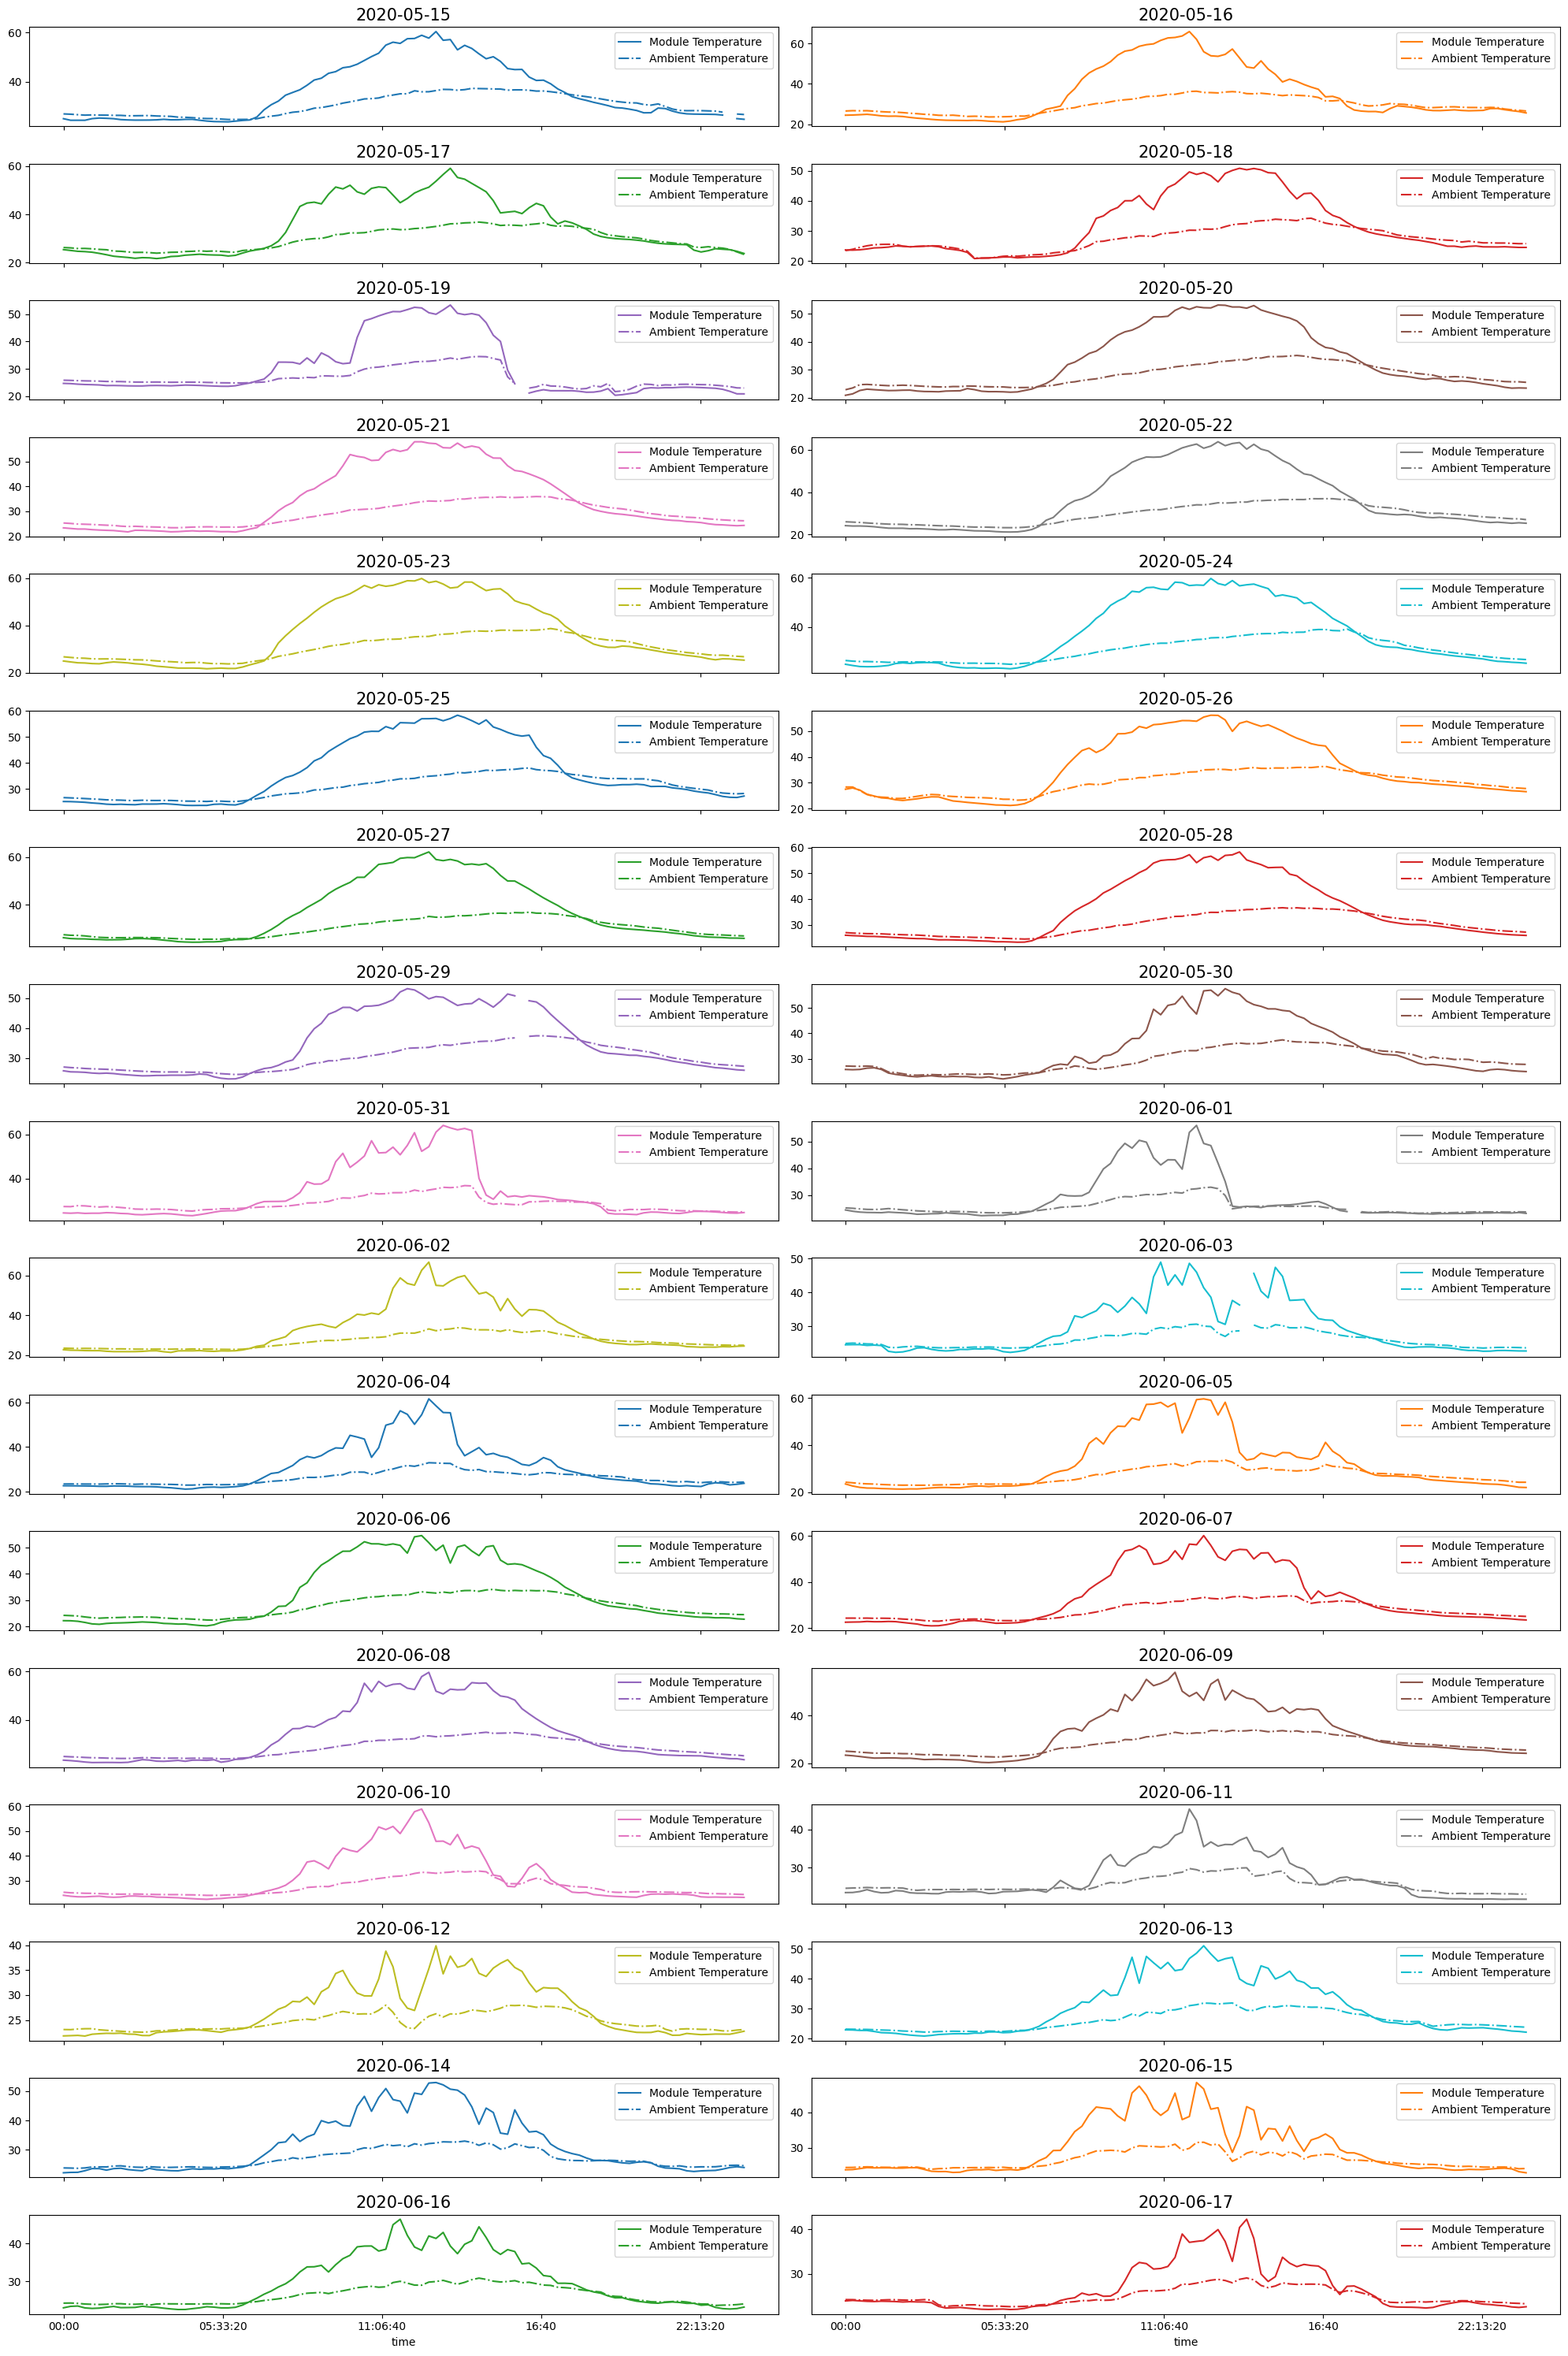

In [86]:
ax= temp_wea2.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
temp_wea2.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(temp_cols2.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

**Observations**

After observing the above two graphs, we can say that we dont have that much missing data in plant 2 like we had in plant 1. And this also proves our findings from section 1.6. There we mentioned the missing row percentage, which is
* *No of missing rows in Plant 01 Generation Data = 3030 rows (4.22%)*
* *No of missing rows in Plant 01 Weather Sensor Data = 82 rows (2.51%)*


* *No of missing rows in Plant 02 Generation Data= 4110 rows (5.72%)*
* *No of missing rows in Plant 02 Weather Sensor Data = 05 rows (0.15%)*

---
### **Section 3:** Selection of significant features
* Select columns that will be relevant
* Create a new working data set (for example)


In order to find the significant features, first we have to find the correlation between all the features both in plant 1 and plant 2.

**Plant 1 Correlation**

In [87]:
print('Plant 1 Correlation:')
df_plant1.corr()

Plant 1 Correlation:


DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DC_POWER             1.000000  0.999996     0.082243     0.003851   
AC_POWER             0.999996  1.000000     0.082193     0.003840   
DAILY_YIELD          0.082243  0.082193     1.000000     0.009896   
TOTAL_YIELD          0.003851  0.003840     0.009896     1.000000   
AMBIENT_TEMPERATURE  0.724668  0.724903     0.478496    -0.036150   
MODULE_TEMPERATURE   0.954811  0.954924     0.198308    -0.015596   
IRRADIATION          0.989391  0.989340     0.078317    -0.005490   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DC_POWER                        0.724668            0.954811     0.989391  
AC_POWER                        0.724903            0.954924     0.989340  
DAILY_YIELD                     0.478496            0.198308     0.078317  
TOTAL_YIELD                    -0.036150           -0.015596    -0.005490  
AMBIENT_TEMPERATURE             1.000000            0.855420     0.725278  
MODULE_TEMPERATURE              0.855420            1.000000     0.961511  
IRRADIATION                     0.725278            0.961511     1.000000

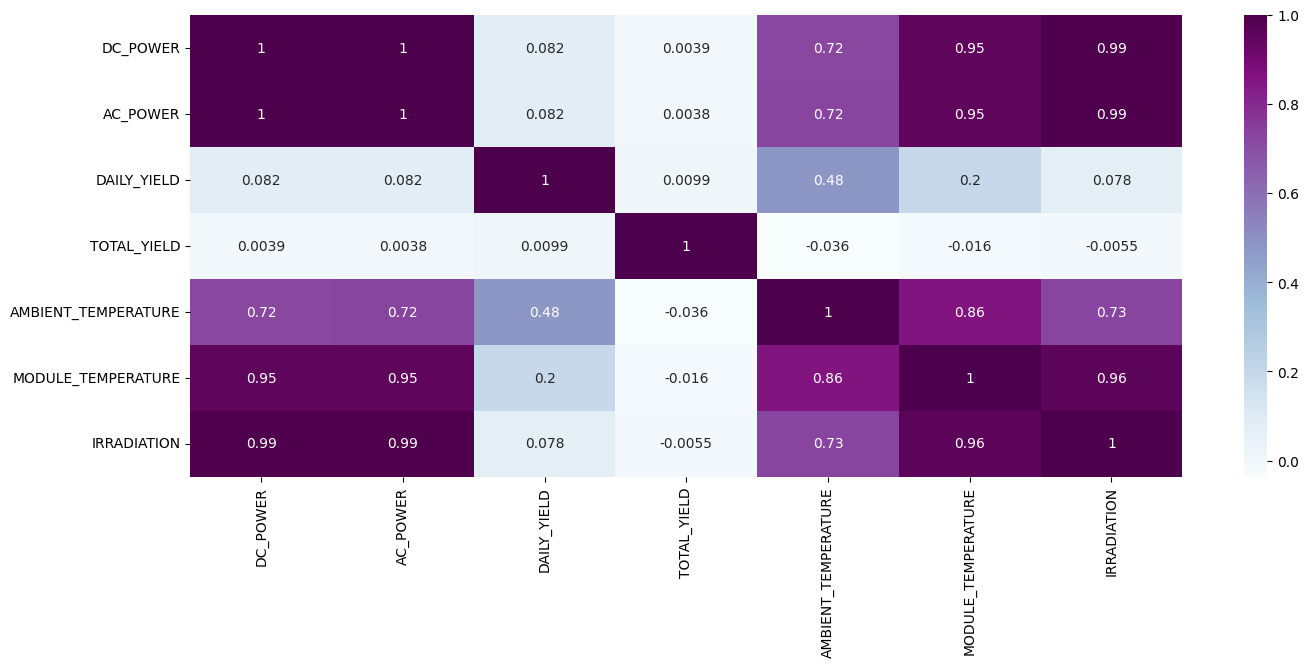

In [88]:
plt.figure(figsize=(16,6))
sns.heatmap(df_plant1.corr(),cmap="BuPu", annot=True)
plt.show()

**Plant 2 Correlation**

In [89]:
print('Plant 2 Correlation:')
df_plant2.corr()

Plant 2 Correlation:


DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DC_POWER             1.000000  0.999997     0.005593     0.004528   
AC_POWER             0.999997  1.000000     0.005395     0.004533   
DAILY_YIELD          0.005593  0.005395     1.000000    -0.068472   
TOTAL_YIELD          0.004528  0.004533    -0.068472     1.000000   
AMBIENT_TEMPERATURE  0.563232  0.563324     0.321785     0.002774   
MODULE_TEMPERATURE   0.749676  0.749604     0.046787    -0.004646   
IRRADIATION          0.780978  0.780851    -0.107987    -0.006720   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DC_POWER                        0.563232            0.749676     0.780978  
AC_POWER                        0.563324            0.749604     0.780851  
DAILY_YIELD                     0.321785            0.046787    -0.107987  
TOTAL_YIELD                     0.002774           -0.004646    -0.006720  
AMBIENT_TEMPERATURE             1.000000            0.848976     0.671998  
MODULE_TEMPERATURE              0.848976            1.000000     0.947057  
IRRADIATION                     0.671998            0.947057     1.000000

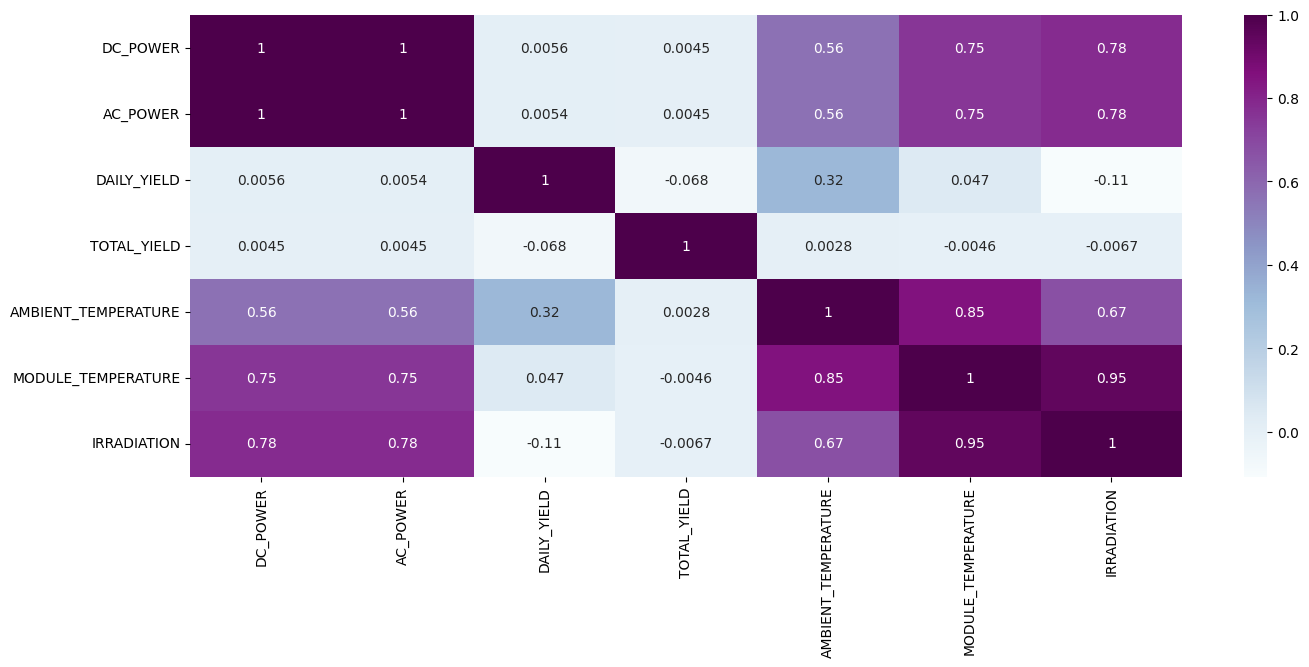

In [90]:
plt.figure(figsize=(16,6))
sns.heatmap(df_plant2.corr(),cmap="BuPu", annot=True)
plt.show()

***Observation***

From the above plant 1 and plant 2 correlation and heatmap, we can decide that
* DC Power and AC Power both have almost identical correlation value with other features. So, we can easily drop one. In our case, we will drop AC Power and continue with DC Power.
* DC Power is highly dependant on Ambient Temperature, Module Temperature and Irradiation. 
* Daily Yield and Total yield do not have significant importance on DC Power. So, these two features can be removed.

For simplification, We will now create a heat map for both Plant 1 and Plant 2 showing correlation between DC_Power, Ambient_temperature, Module_Temperature and Irradiation.

**Simplified Heatmap of Plant 1**

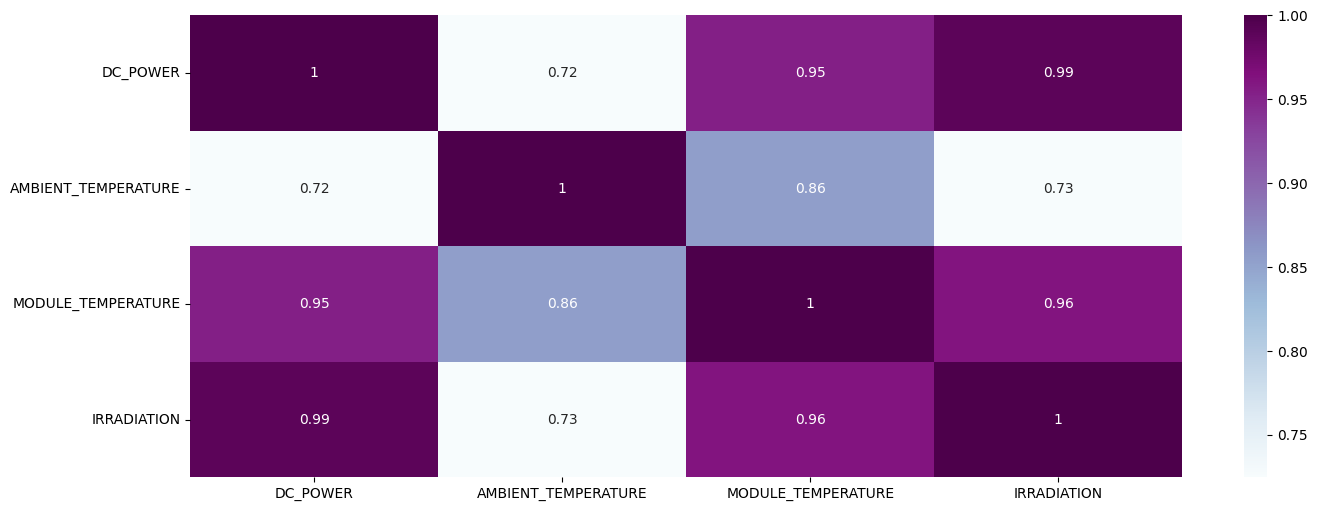

In [91]:
plt.figure(figsize=(16,6))
sns.heatmap(df_plant1.drop(columns=['AC_POWER','DAILY_YIELD','TOTAL_YIELD']).corr(),cmap="BuPu", annot=True)
plt.show()

**Simplified Heatmap of Plant 2**

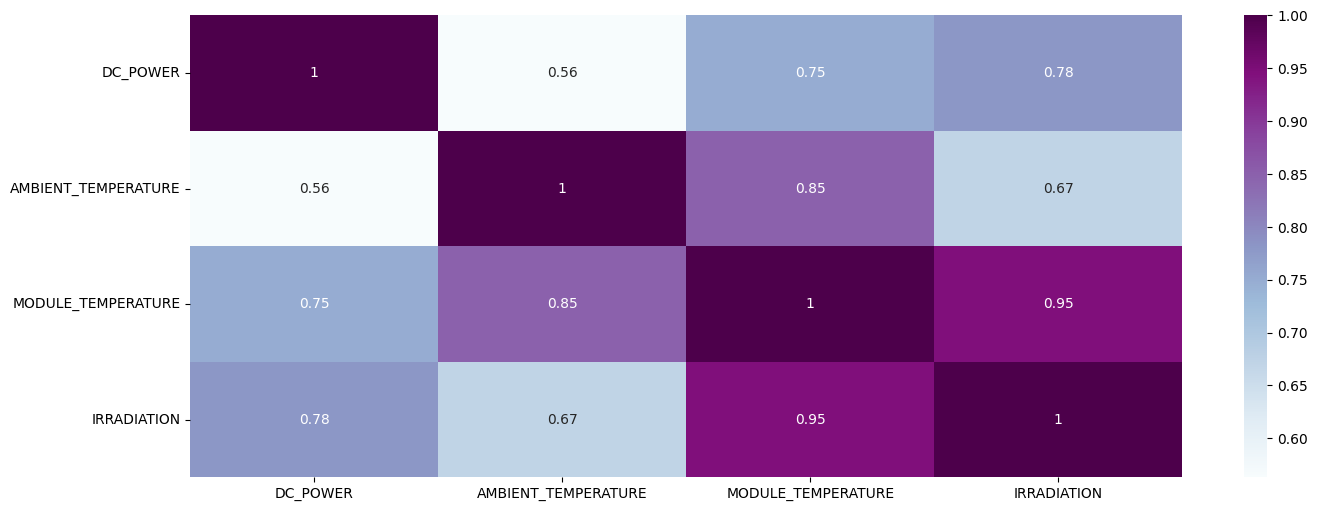

In [92]:
plt.figure(figsize=(16,6))
sns.heatmap(df_plant2.drop(columns=['AC_POWER','DAILY_YIELD','TOTAL_YIELD']).corr(),cmap="BuPu", annot=True)
plt.show()

---
### **Section 4:** Problem statement

After analyzing the data of Plant 1 and Plant 2, we have decided that among all the features **DC Power** is the *best features of interest*. We will predict the DC Power Generation in our modeling based on Ambient Temperature, Module Temperature and Irradiation, and find the error percentage.

---
### **Section 5:** Choice of ML model

Initially, we will work with four different ML Model for our dataset and will try to find out the R2 Score and Negative Mean Squared Error (nMSE) for each model. Our four ML Models are,
1. Linear Regression    
2. Ridge Regression 
3. Random Forest Regression 
4. Polynomial Regression

In [93]:
from sklearn.model_selection import train_test_split
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [94]:
# Define X, Y for Plant 1
X =df_plant1 [['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
Y = df_plant1['DC_POWER']

In [95]:
# Dataframe to store different model performance for Plant 1 and Plant 2
model_eval_P1 = pd.DataFrame(columns=['Model', 'R2', 'nMSE'])
model_eval_P2 = pd.DataFrame(columns=['Model', 'R2', 'nMSE'])

In [96]:
#Linear Regression for plant 1
l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
plant1_LR_R2 = cross_val_score(l_regression, x_scaled, Y, cv=kf, scoring='r2')
plant1_LR_nMSE = cross_val_score(l_regression, x_scaled, Y, cv=kf, scoring='neg_mean_squared_error')

model_eval_P1.loc[len(model_eval_P1.index)] = ['Linear Regression', plant1_LR_R2.mean(), plant1_LR_nMSE.mean()]


In [97]:
# Define X, Y for Plant 2
X2 =df_plant2 [['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
Y2 = df_plant2['DC_POWER']

In [98]:
#Linear Regression for plant2
l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X2)
plant2_LR_R2 = cross_val_score(l_regression, x_scaled, Y2, cv=kf, scoring='r2')
plant2_LR_nMSE = cross_val_score(l_regression, x_scaled, Y2, cv=kf, scoring='neg_mean_squared_error')

model_eval_P2.loc[len(model_eval_P2.index)] = ['Linear Regression', plant2_LR_R2.mean(), plant2_LR_nMSE.mean()]


In [99]:
# Random forest for Plant 1 
R_random=RandomForestRegressor()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
plant1_RandF_R2 = cross_val_score(R_random, x_scaled, Y, cv=kf, scoring='r2')
plant1_RandF_nMSE = cross_val_score(R_random, x_scaled, Y, cv=kf, scoring='neg_mean_squared_error')

model_eval_P1.loc[len(model_eval_P1.index)] = ['Random Forest', plant1_RandF_R2.mean(), plant1_RandF_nMSE.mean()]

In [100]:
# Random Fprest for Plant 2 
R_random=RandomForestRegressor()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X2)
plant2_RandF_R2 = cross_val_score(R_random, x_scaled, Y2, cv=kf, scoring='r2')
plant2_RandF_nMSE = cross_val_score(R_random, x_scaled, Y2, cv=kf, scoring='neg_mean_squared_error')


model_eval_P2.loc[len(model_eval_P2.index)] = ['Random Forest', plant2_RandF_R2.mean(), plant2_RandF_nMSE.mean()]

In [101]:
# Polynomial Regression for Plant1
x_scaled = min_max_scaler.fit_transform(X)
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.LinearRegression())
plant1_PolR_R2 = cross_val_score(model, x_scaled, Y, cv=kf, scoring='r2')
plant1_PolR_nMSE = cross_val_score(model, x_scaled, Y, cv=kf, scoring='neg_mean_squared_error')

model_eval_P1.loc[len(model_eval_P1.index)] = ['Polynomial Regression', plant1_PolR_R2.mean(), plant1_PolR_nMSE.mean()]


In [102]:
# Polynomial Regression for Plant2
x_scaled = min_max_scaler.fit_transform(X2)
model = make_pipeline(PolynomialFeatures(degree=3),linear_model.LinearRegression())
plant2_PolR_R2 = cross_val_score(model, x_scaled, Y2, cv=kf, scoring='r2')
plant2_PolR_nMSE = cross_val_score(model, x_scaled, Y2, cv=kf, scoring='neg_mean_squared_error')


model_eval_P2.loc[len(model_eval_P2.index)] = ['Polynomial Regression', plant2_PolR_R2.mean(), plant2_PolR_nMSE.mean()]


In [103]:
#Ridge Regression for Plant1
l_ridge = linear_model.Ridge()
x_scaled = min_max_scaler.fit_transform(X)
plant1_RidgeR_R2 = cross_val_score(l_ridge, x_scaled, Y, cv=kf, scoring='r2')
plant1_RidgeR_nMSE = cross_val_score(l_ridge, x_scaled, Y, cv=kf, scoring='neg_mean_squared_error')

model_eval_P1.loc[len(model_eval_P1.index)] = ['Ridge Regression', plant1_RidgeR_R2.mean(), plant1_RidgeR_nMSE.mean()]


In [104]:
#Ridge Regression for Plant2 
l_ridge = linear_model.Ridge()
x_scaled = min_max_scaler.fit_transform(X2)
plant2_RidgeR_R2 = cross_val_score(l_ridge, x_scaled, Y2, cv=kf, scoring='r2')
plant2_RidgeR_nMSE = cross_val_score(l_ridge, x_scaled, Y2, cv=kf, scoring='neg_mean_squared_error')

model_eval_P2.loc[len(model_eval_P2.index)] = ['Ridge Regression', plant2_RidgeR_R2.mean(), plant2_RidgeR_nMSE.mean()]


In [105]:
#Performance of different models for plant 1
print("Models Performance for Plant 1")
model_eval_P1

Models Performance for Plant 1


Model        R2         nMSE
0      Linear Regression  0.978570 -3457.696671
1          Random Forest  0.979598 -3308.500986
2  Polynomial Regression  0.981421 -3007.918609
3       Ridge Regression  0.978565 -3458.093710

In [106]:
#Performance of different models for plant 2
print("Models Performance for Plant 2")
model_eval_P2

Models Performance for Plant 2


Model        R2          nMSE
0      Linear Regression  0.609987 -53466.357821
1          Random Forest  0.636604 -50186.387183
2  Polynomial Regression  0.653801 -47918.139712
3       Ridge Regression  0.609998 -53461.134779

Based on the R2 score and nMSE value, we have tried to figure out which ML model will be best suited for our dataset.

When we look at the model performance of each plant, we can see that Polynomial Regression has the best highest R2 score and the best lowest nMSE value. Based on this result, we have decided to choose **Polynomial Regression** for our ML Modeling.

---
### **Section 6:** Parameter tuning


In "Choice of ML Model" section, we have decided to predict the DC_Power with Polynomial Regression.
So for best performance of model, we need to optimize the parameters. That's why we are using GridSearchCv Hyper parameter tunning method.

*GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.*

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#### **6.1 Parameter Tuning of Plant 01**

In [108]:
X, y = df_plant1[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE","IRRADIATION"]].values, df_plant1["DC_POWER"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
param_grid_plant1 = [
    {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('Linear', LinearRegression())])
grid_search_plant1 = GridSearchCV(pipeline, param_grid_plant1, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_plant1.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('Linear', LinearRegression())]),
             param_grid=[{'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [110]:
grid_search_plant1.best_params_ # Here we find the best parameter for plant1


{'poly__degree': 8}

#### **6.2 Parameter Tuning of Plant 02**

In [111]:
X1, y1 = df_plant2[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE","IRRADIATION"]].values, df_plant2["DC_POWER"].values
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [112]:
param_grid_plant2 = [
    {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('Linear', LinearRegression())])
grid_search_plant2 = GridSearchCV(pipeline, param_grid_plant2, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_plant2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('Linear', LinearRegression())]),
             param_grid=[{'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [113]:
grid_search_plant2.best_params_ # Here we find the best parameter for plant2

{'poly__degree': 9}

---
### **Section 7:** Making predictions

#### **7.1 Prediction Data of Plant 01**

From the Machine Learning choice section we chose polynomial regression for prediction. We get also best parameter from parameter tunning

* For Plant 1 best parameter is 8

* For Plant 2 best parameter is 9

In [114]:
plant1_poly = PolynomialFeatures(degree=8, include_bias=False)
plant1_poly_features = plant1_poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(plant1_poly_features, y, test_size=0.2, random_state=42)

In [115]:
plant1_poly_reg_model = LinearRegression()
plant1_poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [116]:
plant1_poly_reg_y_predicted =plant1_poly_reg_model.predict(X_test)

In [117]:
plant1_poly_reg_y_predicted

array([1078.86349559,   -3.09349008,  588.43169416, ...,    6.43278493,
         25.68977459,  994.67718673])

#### **7.2 Prediction Data of Plant 02**

In [118]:
plant2_poly = PolynomialFeatures(degree=9, include_bias=False)
plant2_poly_features = plant2_poly.fit_transform(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(plant2_poly_features, y1, test_size=0.2, random_state=42)

In [119]:
plant2_poly_reg_model = LinearRegression()
plant2_poly_reg_model.fit(X1_train, y1_train)

LinearRegression()

In [120]:
plant2_poly_reg_y_predicted =plant2_poly_reg_model.predict(X1_test)

#### **7.3 Plotting of "Actual DC VS Predicted DC" for Plant 1**

In [121]:
plant1_pred_actual = pd.DataFrame()
plant1_pred_actual['Actual DC'] = y_test
plant1_pred_actual['Predicted DC'] = plant1_poly_reg_y_predicted
plant1_pred_actual['Instance'] = plant1_pred_actual.index
plant1_pred_actual

Actual DC  Predicted DC  Instance
0       893.787500   1078.863496         0
1         0.000000     -3.093490         1
2       626.457143    588.431694         2
3         0.000000      0.705704         3
4       101.485714    137.054269         4
...            ...           ...       ...
13750     0.000000      5.449489     13750
13751    10.814286      7.080504     13751
13752     0.000000      6.432785     13752
13753     0.000000     25.689775     13753
13754  1122.357143    994.677187     13754

[13755 rows x 3 columns]

##### **Simplified View of "Actual DC VS Predicted DC"**

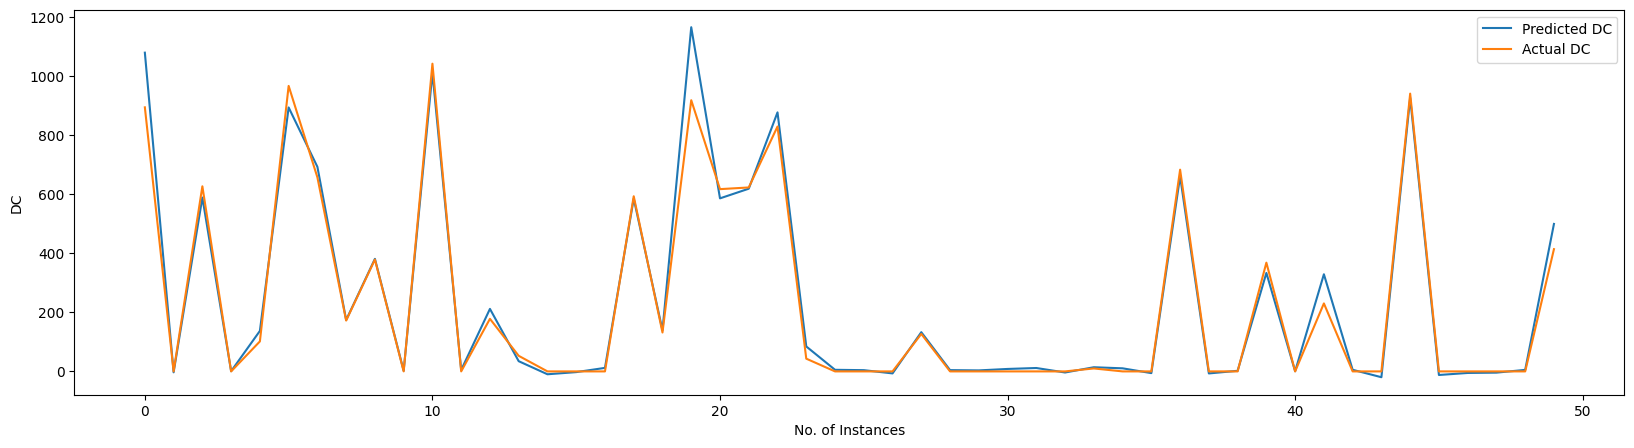

In [122]:
plant1_pred_actual2 = plant1_pred_actual[0:50]
plant1_pred_actual2.plot(x="Instance", y = ["Predicted DC","Actual DC"], figsize=(20,5), xlabel= "No. of Instances", ylabel="DC")
plt.show()

#### **7.4 Plotting of "Actual DC VS Predicted DC" for Plant 2**

In [123]:
plant2_pred_actual = pd.DataFrame()
plant2_pred_actual['Actual DC'] = y1_test
plant2_pred_actual['Predicted DC'] = plant2_poly_reg_y_predicted
plant2_pred_actual['Instance'] = plant2_pred_actual.index
plant2_pred_actual

Actual DC  Predicted DC  Instance
0      1090.242857    672.038727         0
1       740.613333    628.162943         1
2         0.000000    -10.762796         2
3         0.000000      2.715777         3
4         0.000000     -3.778401         4
...            ...           ...       ...
13535     0.000000    773.755212     13535
13536    18.546667     21.850261     13536
13537   480.693333    408.428544     13537
13538     0.000000     -5.144009     13538
13539     0.000000     -3.771534     13539

[13540 rows x 3 columns]

##### **Simplified View of "Actual DC VS Predicted DC"**

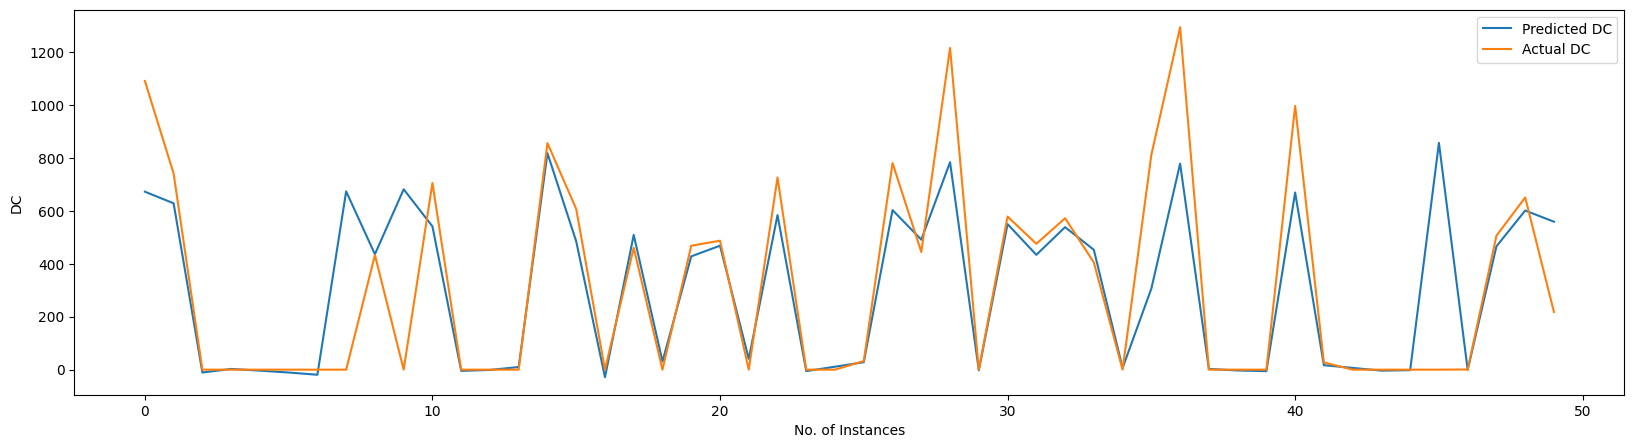

In [124]:
plant2_pred_actual2 = plant2_pred_actual[0:50]
plant2_pred_actual2.plot(x="Instance", y = ["Predicted DC","Actual DC"], figsize=(20,5), xlabel= "No. of Instances", ylabel="DC")
plt.show()

---
### **Section 8:** Model evaluation 

For evaluating our decided model we used 4 types of evaluation metrics for Plant 1 and Plant 2.

| Serial | Metrics  | Description | 
| --- | --- | --- |
| 1 | **R2 Score** | the proportion of the variance in the dependent variable that is predictable from the independent variable. |
| 2 | **Mean Absolute Error (MAE)** | is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values  and the predicted ones. |
| 3 | **Mean Absolute Percentage Error** | One of the most common metrics used to measure the forecasting accuracy of a model is MAPE.
| 4 | **Mean Squared Error (MSE)** | The mean squared error tells  how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

#### **8.1 Evaluation of Plant 1**

In [125]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [126]:
R2_Score_plant1 = round(r2_score(y_test,plant1_poly_reg_y_predicted) * 100, 2)
print("R2 Score of plant 1 : ",R2_Score_plant1,"%")
mae_plant1=mean_absolute_error(y_test,plant1_poly_reg_y_predicted)
print("MAE of plant 1 : ",mae_plant1)
mape_plant1 = mean_absolute_percentage_error(y_test,plant1_poly_reg_y_predicted)
print("MAPE of plant 1 : ",mape_plant1,"%")
mse_plant1=mean_squared_error(y_test,plant1_poly_reg_y_predicted)
print("MSE of plant 1 : ",mse_plant1)


R2 Score of plant 1 :  98.01 %
MAE of plant 1 :  28.137565150792536
MAPE of plant 1 :  2.0433401663440704e+16 %
MSE of plant 1 :  3210.137448981551


#### **8.2 Evaluation of Plant 2**

In [127]:
R2_Score_plant2 = round(r2_score(y1_test,plant2_poly_reg_y_predicted) * 100, 2)
print("R2 Score of plant 2 : ",R2_Score_plant2,"%")
mae_plant2=mean_absolute_error(y1_test,plant2_poly_reg_y_predicted)
print("MAE of plant 2 : ",mae_plant2)
mape_plant2 = mean_absolute_percentage_error(y1_test,plant2_poly_reg_y_predicted)
print("MAPE of plant 2 : ",mape_plant2,"%")
mse_plant2=mean_squared_error(y1_test,plant2_poly_reg_y_predicted)
print("MSE of plant 2 : ",mse_plant2)

R2 Score of plant 2 :  66.54 %
MAE of plant 2 :  97.32425247986913
MAPE of plant 2 :  1.8326625489768048e+17 %
MSE of plant 2 :  45666.123846900795


### Conclusions

In this project we have gained insight on important aspects of data analysis and machine learning especially the regression models. In particular, we explored the polynomial regression model of `sklearn` and made comparisons with linear, `ridgen`, and `random forest` regressions from sklearn [10]. We found that the polynomial regression performed the best our data sets. Comparing data from different sources (Plant1 and Plant2) we saw that the same regression models performed better on the Plant 1 than on the Plant 2. 

We have also developed useful skills with exploring Python and Pandas modules. We have gained hand-ons experience with some real data and  built some necessary research skills. Useful skills on collaboration and team work were developed.

In future we might want to merge the data sets from both plants, and build a composite model comprising of a cluster and a regression model. This is because the data sets from both plants appear to have different characteristics.

### Reflections


This project reflects the following core factors:

1. We are introduced the most usable data analysys and visualisation tools called numpy, pandas, matpoltlib, scikit-learn and the various uses of this tool.
2. In the modeling part we are introduced various kinds of regression models including Linear, Ridge, Polynomial and RandomForest. Also, we have a chance to compare between the models and find the best fit model for the dataset.
3. For the prediction part we moved forwaed with the polynimial as the evalution matrix were suggesting so. By using the model we tried to predict for the future.
4. For future work other dependent variables can considerd and work on how efficiently the target variable can be predicted.

### References

1. Saur News Bureau,  *Here is how you can calculate the annual solar energy output of a photovoltaic system.* Saur Energy International, updated Mar. 25, 2016, and sourced on 10th Nov, 2022 via  [available here](https://www.saurenergy.com/solar-energy-blog/here-is-how-you-can-calculate-the-annual-solar-energy-output-of-a-photovoltaic-system).
2. Jinish Rajan, *How To Calculating Energy Yield Of the Array.* LinkedIn, Published on October 1, 2020, Sourced on 11th Nov, 2022 via [available here](https://www.linkedin.com/pulse/how-calculating-energy-yield-array-jinish-rajan/).
3. Ani Kannal, *Solar Power Generation Data*. Kaggle, update 2 years ago, and sourced on 28th Oct., 2022 via [available here](https://www.kaggle.com/datasets/anikannal/solar-power-generation-data).
4. Antorweep Chakravorty, *Lecture Notes - Introduction to Data Science, DAT 540*, Autumn 2022 [available here](https://stavanger.instructure.com/courses/10764/files/folder/Lectures%2022H).
5.  Neel Kanwal, *Laboratory Exercises - Introduction to Data Science, DAT 540*, Autumn 2022 [available here](https://stavanger.instructure.com/courses/10764/files/folder/Laboratories%2022H).
6. Mohammad RezaMaghami,*Power loss due to soiling on solar panel*, 2016 [available here](https://www.sciencedirect.com/science/article/pii/S1364032116000745).
7. Anuradha Wickramarachchi, *Machine Learning: Model Selection and Hyperparameter Tuning*, 2020 [available here](https://towardsdatascience.com/machine-learning-model-selection-and-hyperparameter-tuning-736158357dc4)
8. Tamas Ujhelyi, *Polynomial Regression in Python using scikit-learn (with a practical example)*, 2021 [available here](https://data36.com/polynomial-regression-python-scikit-learn/?fbclid=IwAR1pm1yDRPrRtlfbcDskaPJnJ-we6mHquMIkBS9X3N9QYdALhl-jIpFdDc8)
9. Nhan Tran, *Machine Learning: Polynomial Regression with Python*, 2019 [available here](https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386)
10. Pedregosa et al., *Scikit-learn: Machine Learning in Python,* JMLR 12, pp. 2825-2830, 2011.